# Imports and Initialisation

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# cd /content/drive/MyDrive/codwithmani

/content/drive/MyDrive/codwithmani


#Installs and Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from scipy.stats import ttest_rel, entropy, kstest
import scipy.stats as stats
import statsmodels.api as sm

#Parameters

In [ ]:
folder = "AEZ13_final_hopefully_ci-1"
filename = ".csv"

In [ ]:
file_to_compare = "/matchings_blockLevel.csv"
# file_to_compare = 'covariate_matchings_blockLevel.csv'

In [ ]:
second = 'After PSM'
first = 'Before PSM'
# second = 'Covariate nn matching'

#Mean & STD

In [ ]:
# df = pd.read_csv('./AES_data_regcode13/'+folder+'/'+'covariates.csv')
df=pd.read_csv('./original.csv')

In [ ]:
df = df[df['Treatment']==1]
df

idx  Unnamed: 0          system:index  Treatment        lat        lon  \
0      0          12  00000000000000000016          1  25.103869  87.280995   
1      1          25  00000000000000000029          1  26.176702  86.241882   
2      2          26  0000000000000000002a          1  26.076810  86.079976   
3      3          27  0000000000000000002c          1  26.131438  86.059228   
4      4          45  00000000000000000040          1  25.936834  85.994986   
..   ...         ...                   ...        ...        ...        ...   
424  424        1869  00000000000000000ac8          1  27.322437  81.763508   
425  425        1874  00000000000000000ad2          1  27.346423  81.575370   
426  426        1887  00000000000000000ae9          1  27.379487  82.289803   
427  427        1929  00000000000000000b29          1  27.546632  82.267378   
428  428        1943  00000000000000000b3c          1  27.399874  82.337109   

     dist_closest_lin  dist_closest_river  dist_closest_road  \
0           -0.134451            0.848528          -1.469108   
1           -0.039732            0.418406          -0.816671   
2            0.423802           -0.161008          -0.530568   
3            0.401383           -0.222563          -1.394680   
4           -0.658939           -0.305348          -1.648261   
..                ...                 ...                ...   
424          1.988970            0.826867          -0.559838   
425          1.988928           -0.488385           0.817096   
426          1.988870           -0.236186          -0.022059   
427          0.258610            0.523497          -0.627548   
428          1.988834           -0.409222           0.866846   

     dist_closest_upstream_forest  elevation     slope  flow_accumulation  \
0                        1.729130  -0.774775  0.734745          -0.957141   
1                       -1.937200  -0.602096  0.993236           0.423464   
2                       -0.627839  -0.790297 -0.337730           0.860320   
3                       -1.937200  -0.644777  1.191541           0.423464   
4                       -0.461273  -0.749904  0.663905           1.437364   
..                            ...        ...       ...                ...   
424                      0.358752   0.427698 -0.878443           0.750051   
425                      0.842848   0.450814 -0.790348          -0.957141   
426                      0.263978   0.344234  0.918308          -0.957141   
427                      0.772012   0.528238  0.643557          -0.957141   
428                      0.490967   0.322671  1.266099          -0.957141   

     proximity_water  drainage_density  cropping_intensity_2016-2017   HSG  \
0           0.812527          0.455174                           2.0  13.0   
1           1.205923          0.681376                           2.0   3.0   
2          -0.055328         -0.018411                           1.0  13.0   
3           0.633173          0.360123                           2.0   3.0   
4           1.368170          0.630604                           3.0  13.0   
..               ...               ...                           ...   ...   
424         0.188139         -1.458884                           2.0   3.0   
425        -1.786177         -2.346373                           2.0  13.0   
426        -0.733761         -0.710892                           2.0  13.0   
427        -0.190409          1.145860                           NaN   3.0   
428         1.186134         -0.153341                           1.0   3.0   

          CEC        PH        OC  
0   -0.796380 -1.406058  0.159465  
1    0.304373 -0.309396  1.044892  
2    0.304373 -0.309396  1.044892  
3    0.304373 -0.309396  1.044892  
4    1.353328  1.504017 -0.850520  
..        ...       ...       ...  
424  0.304373 -0.309396  1.044892  
425  0.304373 -0.309396  1.044892  
426  0.304373 -0.309396  1.044892  
427  0.304373 -0.309396  1.044892  
428  0.304373 -0.309396  1.04

In [ ]:
df['elevation'].describe()

count    429.000000
mean       0.021830
std        0.950833
min       -0.976981
25%       -0.576064
50%       -0.198176
75%        0.172476
max        4.179896
Name: elevation, dtype: float64

In [ ]:
df['slope'].describe()

count    429.000000
mean       0.173877
std        0.731885
min       -0.984395
25%       -0.311922
50%        0.056446
75%        0.564042
max        5.793304
Name: slope, dtype: float64

In [ ]:
df['dist_closest_river'].describe()

count    429.000000
mean       0.137498
std        0.910281
min       -2.553935
25%       -0.442747
50%        0.134398
75%        0.789993
max        2.830655
Name: dist_closest_river, dtype: float64

In [ ]:
df['flow_accumulation'].describe()

count    429.000000
mean      -0.035508
std        0.972367
min       -0.957141
25%       -0.957141
50%       -0.239721
75%        0.750051
max        2.020347
Name: flow_accumulation, dtype: float64

In [ ]:
df['dist_closest_lin'].describe()

count    429.000000
mean       0.095544
std        1.034481
min       -4.094956
25%       -0.464230
50%       -0.126196
75%        0.341356
max        1.990650
Name: dist_closest_lin, dtype: float64

In [ ]:
df['dist_closest_road'].describe()

count    429.000000
mean      -0.324977
std        1.152652
min       -2.447757
25%       -1.307233
50%       -0.384505
75%        0.582366
max        2.348716
Name: dist_closest_road, dtype: float64

In [ ]:
df['cropping_intensity_2016-2017'].describe()

count    418.000000
mean       1.808612
std        0.546822
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: cropping_intensity_2016-2017, dtype: float64

In [ ]:
df['dist_closest_upstream_forest'].describe()

count    429.000000
mean       0.041254
std        0.953068
min       -1.937200
25%       -0.462099
50%        0.106210
75%        0.682738
max        2.361026
Name: dist_closest_upstream_forest, dtype: float64

In [ ]:
df['proximity_water'].describe()

count    429.000000
mean      -0.215326
std        0.950775
min       -1.792170
25%       -0.996296
50%       -0.330655
75%        0.483079
max        2.002124
Name: proximity_water, dtype: float64

In [ ]:
df['drainage_density'].describe()

count    429.000000
mean       0.118426
std        1.030681
min       -2.346373
25%       -0.614409
50%       -0.026179
75%        0.682027
max        2.653832
Name: drainage_density, dtype: float64

In [ ]:
df['HSG'].describe()

count    426.000000
mean       7.227700
std        4.943662
min        3.000000
25%        3.000000
50%        3.000000
75%       13.000000
max       13.000000
Name: HSG, dtype: float64

In [ ]:
df['CEC'].describe()

count    429.000000
mean       0.096432
std        1.123224
min       -1.839445
25%       -0.485743
50%        0.304373
75%        1.353328
max        1.353328
Name: CEC, dtype: float64

In [ ]:
df['OC'].describe()

count    429.000000
mean      -0.185103
std        0.976133
min       -1.188014
25%       -1.131092
50%       -0.850520
75%        1.044892
max        1.044892
Name: OC, dtype: float64

In [ ]:
df['PH'].describe()

count    429.000000
mean       0.145060
std        1.041420
min       -1.406058
25%       -0.309396
50%       -0.309396
75%        1.504017
max        1.504017
Name: PH, dtype: float64

#Helper Functions

In [ ]:
# after_treated_df: treated units
# after_untreated_df: control units
def compute_and_plot_kl_divergence(after_treated_df, after_untreated_df, param, color, label):
    print(after_treated_df[param])
    treatment_after_dist, bins = np.histogram(after_treated_df[param], bins = 20, density = True)
    control_after_dist, _ = np.histogram(after_untreated_df[param], bins = bins, density = True)

    kl_divergence = entropy(treatment_after_dist+0.0001, control_after_dist+0.0001)

    _, ax = plt.subplots(figsize = (8, 6))
    ax.hist(after_treated_df[param], bins = bins, alpha = 0.5, edgecolor='white', facecolor=color, label = 'Treatment')
    ax.set_title(f"{param} Distribution")
    ax.set_xlabel(f"{param}")
    ax.set_ylabel("Frequency")
    ax.legend()


    # add the KL divergence to the plot as a text box
    textstr = 'KL Divergence = %.4f' % kl_divergence
    props = dict(boxstyle = 'round', facecolor = 'white', alpha = 0.5)
    ax.text(0.05, 0.95, textstr, transform = ax.transAxes, fontsize = 12, verticalalignment = 'top', bbox = props)
    plt.title(f'K-L divergence for {param} - {label}')
    plt.grid(linestyle='--', color='gray')
    plt.show()
#     plt.savefig(os.path.join(plots_dir, f'{region}_{param}_{model_num}_kl_divergence.png'))
    plt.close()
    return kl_divergence

In [ ]:
# after_treated_df: treated units
# after_untreated_df: control units
def generate_qq_plot(after_treated_df, after_untreated_df, param, color, label):
    # Generate Q-Q plot
    try:
        variable1_quantiles = stats.mstats.mquantiles(after_treated_df[param], prob = np.linspace(0.01, 0.99, 100))
        variable2_quantiles = stats.mstats.mquantiles(after_untreated_df[param], prob = np.linspace(0.01, 0.99, 100))
        treated_param_min = after_treated_df[param].min()
        untreated_param_min = after_treated_df[param].min()
        treated_param_max = after_treated_df[param].max()
        untreated_param_max = after_untreated_df[param].max()
        x_values = [treated_param_min, treated_param_max]
        y_values = [untreated_param_min, untreated_param_max]

        # Plot QQ plot for comparison of two variables
        _, ax = plt.subplots(figsize = (8, 6))

        treatment_after_dist, bins = np.histogram(after_treated_df[param], bins = 20, density = True)
        control_after_dist, _ = np.histogram(after_untreated_df[param], bins = bins, density = True)

        x, y = treatment_after_dist, control_after_dist
        rel = ttest_rel(x,y)
        ks = kstest(x, y)

        textstr = 'KS Statitics = %.4f' % ks.statistic + '\nPaired TTest = %.4f' %rel.statistic
        props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
        plt.text(0.68, 0.95, textstr, transform = ax.transAxes, fontsize = 12, verticalalignment = 'top',bbox = props)


        sm.qqplot_2samples(variable1_quantiles, variable2_quantiles, ax = ax)
        plt.plot(x_values, y_values, color=color)

        ax.set_title(f'QQ plot for comparison of {param} - {label}', fontsize=13)
        ax.set_xlabel('Treated quantiles', fontsize=12)
        ax.set_ylabel('Control quantiles', fontsize=12)
        plt.grid(linestyle='--', color='gray')
        plt.tick_params(labelsize='large')
        plt.show()
#         plt.savefig(os.path.join(plots_dir, f'BIHAR_{param}_{model_num}_qq_plot.png'))
    except Exception as e:
        print(f'Error in qq plot: {e}')

In [ ]:
def kde_plot(treated_df, untreated_df, param, color, label):
  C_COLOUR = 'grey'
  T_COLOUR = color
  C_LABEL = 'Counterfactual'
  T_LABEL = 'Treatment'



  sns.kdeplot(data=untreated_df, x=param, fill=True,
              color=C_COLOUR, label=C_LABEL)
  sns.kdeplot(data=treated_df, x=param, fill=True,
              color=T_COLOUR, label=T_LABEL)
  plt.title(label, fontsize=13)
  plt.xlabel(param, fontsize=12)
  plt.ylabel('Density', fontsize=12)
  plt.legend(fontsize = 12)
  plt.tick_params(labelsize='large')
  plt.show()

In [ ]:
def paired_ttest(treated_df, untreated_df, param, color, label):

  treatment_after_dist, bins = np.histogram(treated_df[param], bins = 20, density = True)
  control_after_dist, _ = np.histogram(untreated_df[param], bins = bins, density = True)

  x, y = treatment_after_dist, control_after_dist
  rel = ttest_rel(x,y)
  ks = kstest(x, y)

  print(f'{label}:- statistics : {rel.statistic}, pvalue : {rel.pvalue}')
  print(ks)

#Analysis

##Matchings normal

In [ ]:
# df = pd.read_csv('./AES_data_regcode13/'+folder+'/'+filename)
df=pd.read_csv('./original.csv')


In [ ]:
df.columns

Index(['idx', 'Unnamed: 0', 'system:index', 'Treatment', 'lat', 'lon',
       'dist_closest_lin', 'dist_closest_river', 'dist_closest_road',
       'dist_closest_upstream_forest', 'elevation', 'slope',
       'flow_accumulation', 'proximity_water', 'drainage_density',
       'cropping_intensity_2016-2017', 'HSG', 'CEC', 'PH', 'OC'],
      dtype='object')

In [ ]:
# treated_df = df[['id', 'elevation', 'slope', 'dist_closest_river', 'flow_accumulation',\
#        'dist_closest_lin', 'dist_closest_road', 'cropping_intensity_2016-2017',\
#        'dist_closest_upstream_forest', 'proximity_water']]
# cf_df = df[['id_matched', 'elevation_matched', 'slope_matched',\
#        'dist_closest_river_matched', 'flow_accumulation_matched',\
#        'dist_closest_lin_matched', 'dist_closest_road_matched',\
#        'cropping_intensity_2016-2017_matched', 'dist_closest_upstream_forest_matched', 'proximity_water_matched']]

In [ ]:
# df.dropna()

In [ ]:

df_2 = df[['idx', 'elevation', 'slope', 'dist_closest_river', 'flow_accumulation',\
       'dist_closest_lin', 'dist_closest_road', 'cropping_intensity_2016-2017',\
       'dist_closest_upstream_forest', 'proximity_water','drainage_density','HSG','CEC','PH','OC']]
df_2=df_2.dropna()
treated_df = df_2[df['Treatment']==1]
cf_df = df_2[df['Treatment']!=1]
print(len(treated_df))
print(len(cf_df))

415
1186


<ipython-input-120-d5b1d5cb8c65>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  treated_df = df_2[df['Treatment']==1]
<ipython-input-120-d5b1d5cb8c65>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cf_df = df_2[df['Treatment']!=1]


In [ ]:
# cf_df.columns = ['id', 'elevation', 'slope', 'dist_closest_river', 'flow_accumulation',\
#        'dist_closest_lin', 'dist_closest_road', 'cropping_intensity_2016-2017',\
#        'dist_closest_upstream_forest', 'proximity_water']

##Matchings k matching

In [ ]:
# dfn = pd.read_csv('./AES_data_regcode13/'+folder+'/'+file_to_compare)
dfn=pd.read_csv('./built_mod.csv')


In [ ]:
dfn

idx  Unnamed: 0          system:index        lat        lon  \
0      0          12  00000000000000000016  25.103869  87.280995   
1    413        1673  000000000000000009a0  27.260946  83.156509   
2      1          25  00000000000000000029  26.176702  86.241882   
3    212        1015  000000000000000005c4  26.370321  87.447466   
4      2          26  0000000000000000002a  26.076810  86.079976   
..   ...         ...                   ...        ...        ...   
410  417        1785  00000000000000000a50  27.240956  82.698689   
411  419        1797  00000000000000000a62  27.492342  81.588096   
412  421        1831  00000000000000000a94  27.482247  81.398625   
413  422        1838  00000000000000000a9b  27.710401  81.488676   
414  423        1844  00000000000000000aa9  27.388093  81.670518   

     dist_closest_lin  dist_closest_river  dist_closest_road  \
0           -0.134451            0.848528          -1.469108   
1            0.342579           -1.170173          -1.869777   
2           -0.039732            0.418406          -0.816671   
3           -1.123686           -0.278114          -1.358968   
4            0.423802           -0.161008          -0.530568   
..                ...                 ...                ...   
410         -0.411372            0.226951           1.684909   
411          1.988671           -0.402259           0.776777   
412          1.988689           -2.200939          -0.574027   
413          1.988284           -1.749603          -0.401663   
414          1.988855            0.373397          -0.093065   

     dist_closest_upstream_forest  elevation  ...  elevation_matched  \
0                        1.729130  -0.774775  ...           1.025562   
1                       -0.134799  -0.026693  ...           1.025562   
2                       -1.937200  -0.602096  ...          -0.633542   
3                       -0.145182  -0.462037  ...          -0.633542   
4                       -0.627839  -0.790297  ...          -0.650247   
..                            ...        ...  ...                ...   
410                     -0.498736   0.077821  ...          -0.177237   
411                      0.700513   0.470353  ...          -0.273234   
412                      0.839760   0.523637  ...          -0.487064   
413                     -0.867755   0.591910  ...          -0.759679   
414                      0.343520   0.494837  ...          -0.185674   

     slope_matched  flow_accumulation_matched  proximity_water_matched  \
0         2.181406                  -0.957141                 1.231488   
1         2.181406                  -0.957141                 1.231488   
2        -0.620985                   1.782230                -0.268742   
3        -0.620985                   1.782230                -0.268742   
4         0.127832                   0.161817                -0.694710   
..             ...                        ...                      ...   
410       0.593036                   1.953582                -1.709009   
411      -0.059467                  -0.957141                -0.536202   
412       0.125246                   0.860320                 0.131463   
413      -0.977965                   1.086207                -0.149586   
414      -0.185736                  -0.239721                -1.068872   

     drainage_density_matched  cropping_intensity_2016-2017_matched  \
0                    0.787479                                   1.0   
1                    0.787479                                   1.0   
2                    1.779114                                   2.0   
3                    1.779114                                   2.0   
4                    0.152426                                   2.0   
..                        ...                                   ...   
410                 -0.134720                                   2.0   
411                 -0.544420                                   3.0   
412                  0.193

In [ ]:
# treated_dfn = dfn[['idx', 'elevation', 'slope', 'dist_closest_river', 'flow_accumulation',\
#        'dist_closest_lin', 'dist_closest_road', 'cropping_intensity_2016-2017',\
#        'dist_closest_upstream_forest', 'proximity_water','drainage_density','HSG','CEC','PH','OC']]
treated_dfn=dfn[['idx','dist_closest_lin',
 'dist_closest_river',
 'dist_closest_road',
 'dist_closest_upstream_forest',
 'elevation',
 'slope',
 'flow_accumulation',
 'proximity_water',
 'drainage_density',
 'cropping_intensity_2016-2017',
 'HSG',
 'CEC',
 'PH',
 'OC']]
cf_dfn = dfn[['idx_matched',
    'dist_closest_lin_matched',
    'dist_closest_river_matched',
    'dist_closest_road_matched',
    'dist_closest_upstream_forest_matched',
    'elevation_matched',
    'slope_matched',
    'flow_accumulation_matched',
    'proximity_water_matched',
    'drainage_density_matched',
    'cropping_intensity_2016-2017_matched',
    'HSG_matched',
    'CEC_matched',
    'PH_matched',
    'OC_matched']]
# cf_dfn


In [ ]:
cf_dfn.columns = ['idx','dist_closest_lin',
 'dist_closest_river',
 'dist_closest_road',
 'dist_closest_upstream_forest',
 'elevation',
 'slope',
 'flow_accumulation',
 'proximity_water',
 'drainage_density',
 'cropping_intensity_2016-2017',
 'HSG',
 'CEC',
 'PH',
 'OC']


In [ ]:
print(len(treated_dfn))

415


##KDE Plots

###Elevation

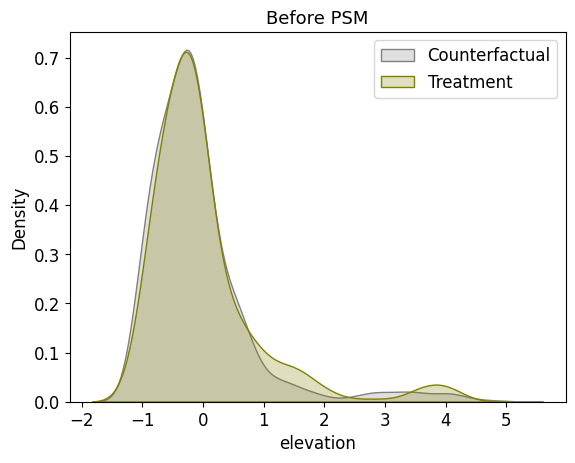

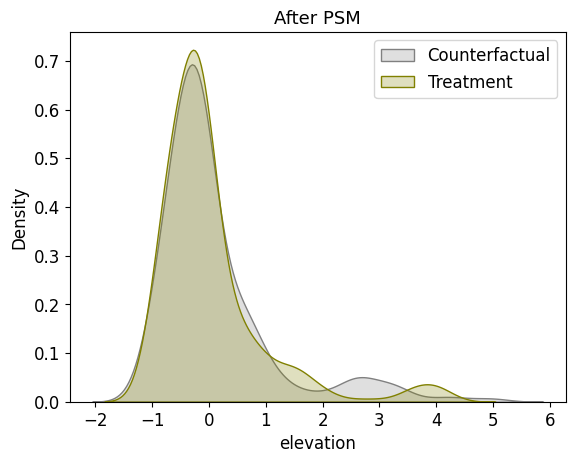

In [ ]:
kde_plot(treated_df, cf_df, 'elevation', 'olive', first)
print()
kde_plot(treated_dfn, cf_dfn, 'elevation', 'olive', second)

###Slope

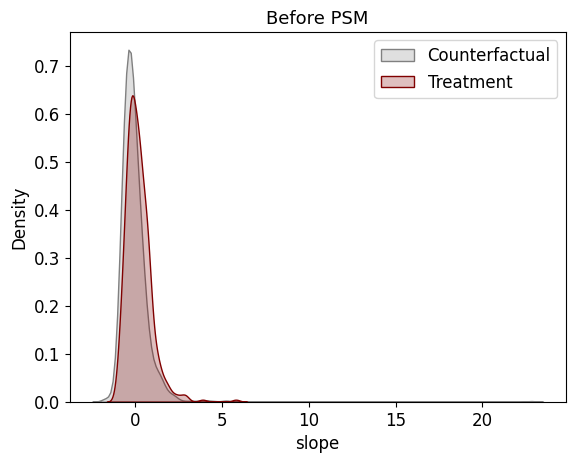

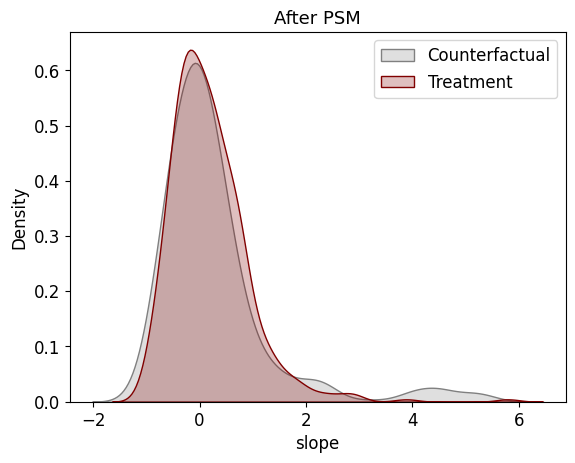

In [ ]:
kde_plot(treated_df, cf_df, 'slope', 'maroon', first)
print()
kde_plot(treated_dfn, cf_dfn, 'slope', 'maroon', second)

###Distance to Closest River

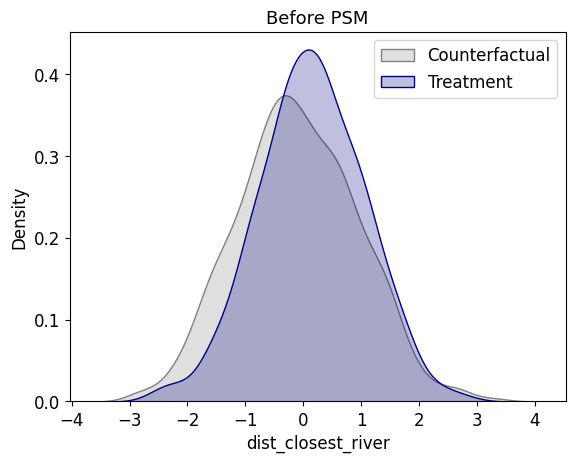

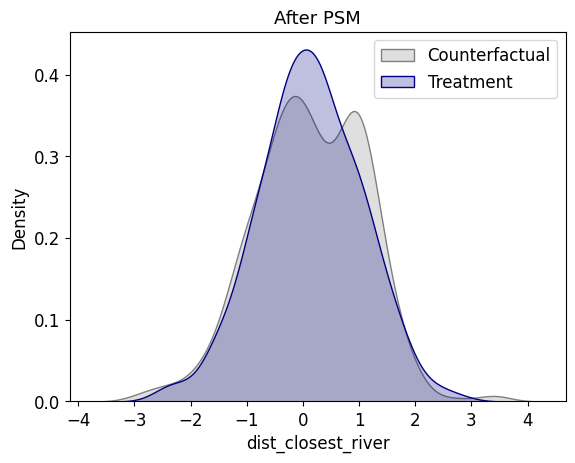

In [ ]:
kde_plot(treated_df, cf_df, 'dist_closest_river', 'navy', first)
print()
kde_plot(treated_dfn, cf_dfn, 'dist_closest_river', 'navy', second)

###Flow Accumulation

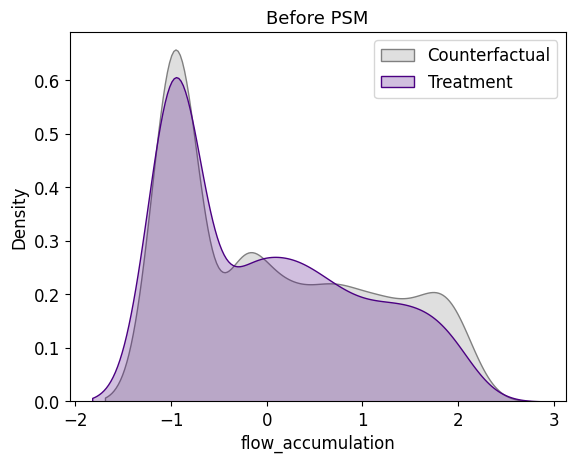

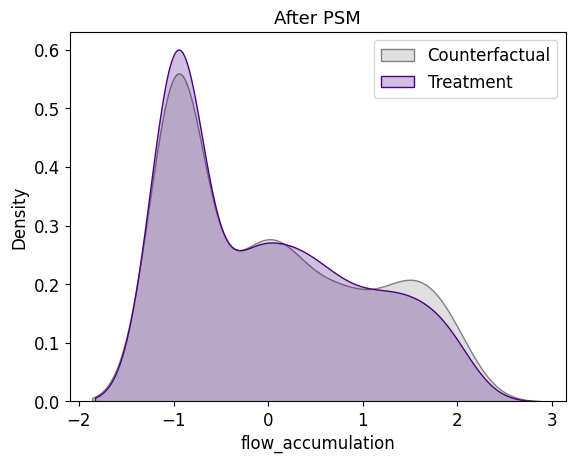

In [ ]:
kde_plot(treated_df, cf_df, 'flow_accumulation', 'indigo', first)
print()
kde_plot(treated_dfn, cf_dfn, 'flow_accumulation', 'indigo', second)

###Distance to Closest Lineament

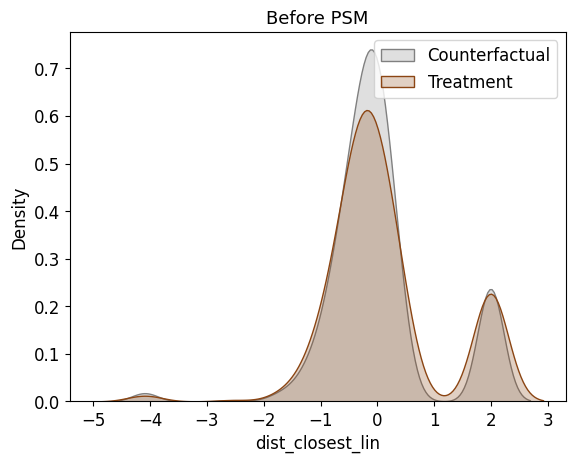

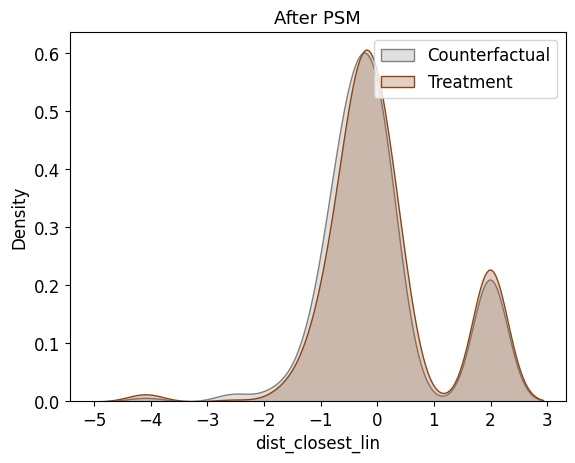

In [ ]:
kde_plot(treated_df, cf_df, 'dist_closest_lin', 'saddlebrown', first)
print()
kde_plot(treated_dfn, cf_dfn, 'dist_closest_lin', 'saddlebrown', second)

###Distance to Closest Road

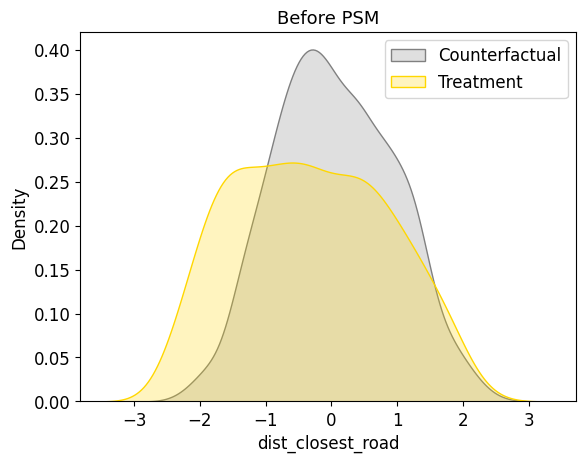

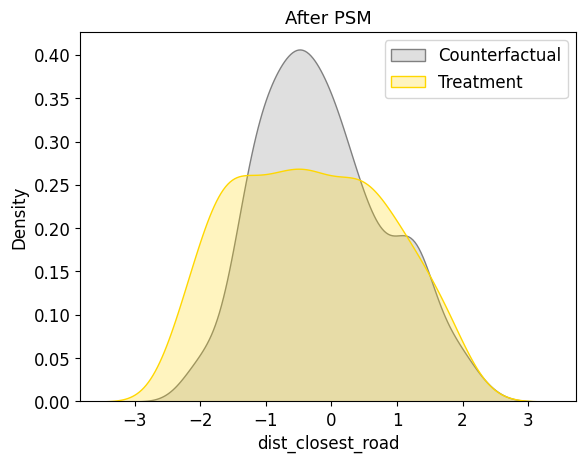

In [ ]:
kde_plot(treated_df, cf_df, 'dist_closest_road', 'gold', first)
print()
kde_plot(treated_dfn, cf_dfn, 'dist_closest_road', 'gold', second)

###Recent Cropping Intensity

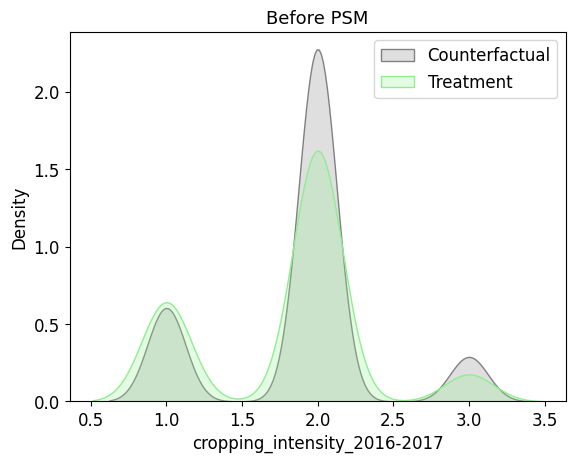

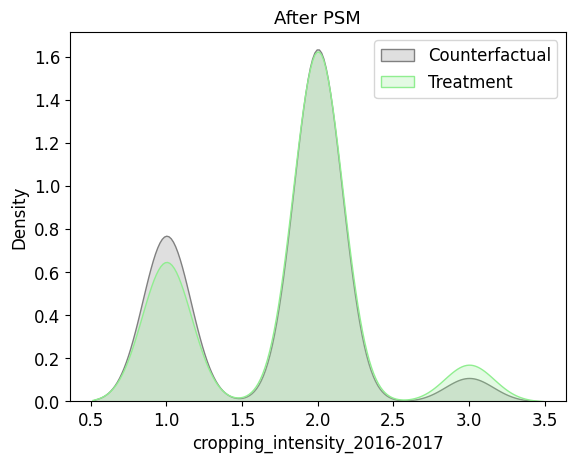

In [ ]:
kde_plot(treated_df, cf_df, 'cropping_intensity_2016-2017', 'lightgreen', first)
print()
kde_plot(treated_dfn, cf_dfn, 'cropping_intensity_2016-2017', 'lightgreen', second)

###Distance to Closest Upstream Forest

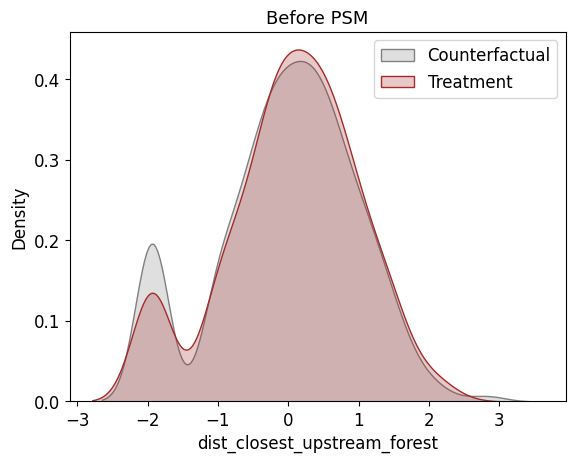

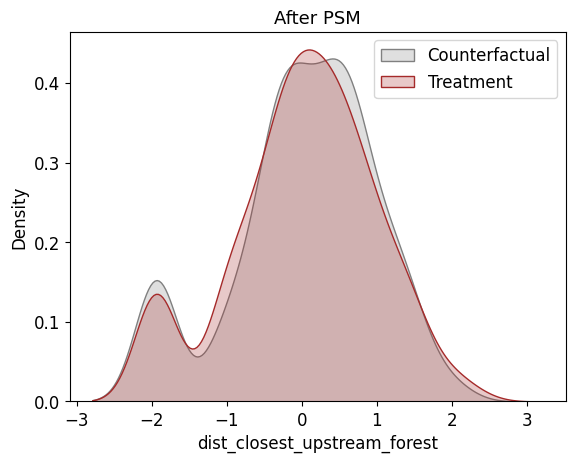

In [ ]:
kde_plot(treated_df, cf_df, 'dist_closest_upstream_forest', 'brown', first)
print()
kde_plot(treated_dfn, cf_dfn, 'dist_closest_upstream_forest', 'brown', second)

###Proximity to Water Pixels

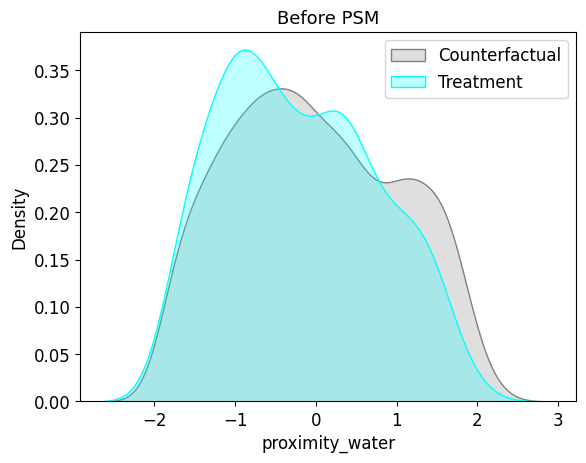

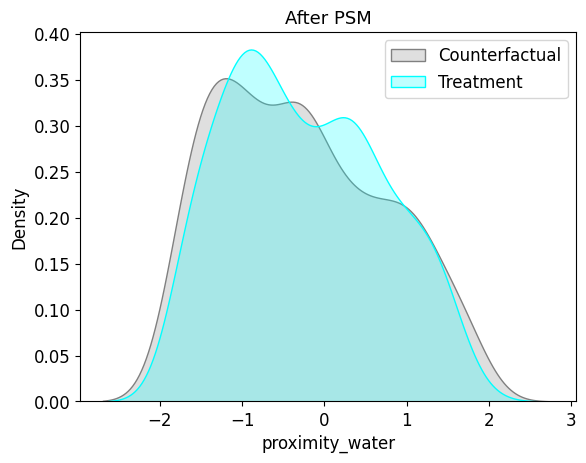

In [ ]:
kde_plot(treated_df, cf_df, 'proximity_water', 'aqua', first)
print()
kde_plot(treated_dfn, cf_dfn, 'proximity_water', 'aqua', second)

###Drainage_density

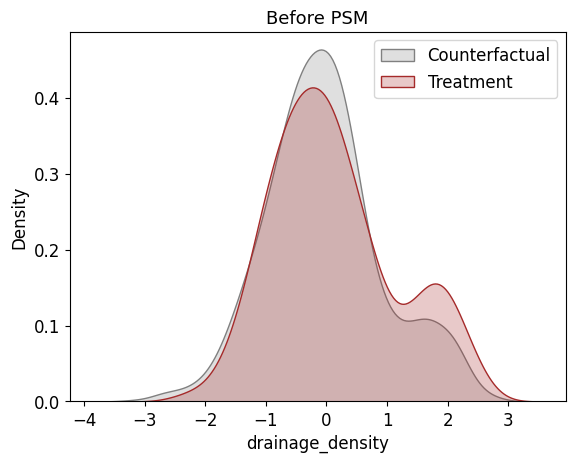

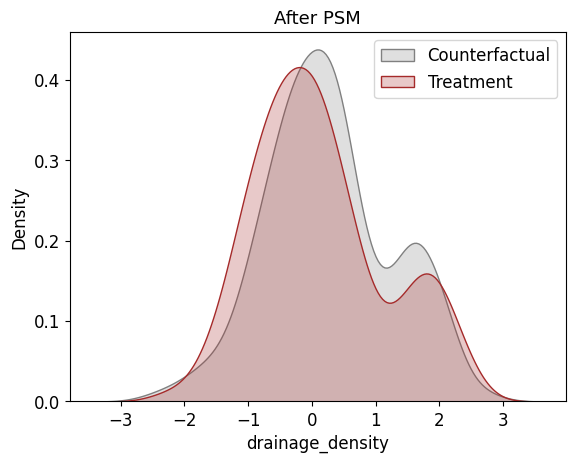

In [ ]:
kde_plot(treated_df, cf_df, 'drainage_density', 'brown', first)
print()
kde_plot(treated_dfn, cf_dfn, 'drainage_density', 'brown', second)

###HSG

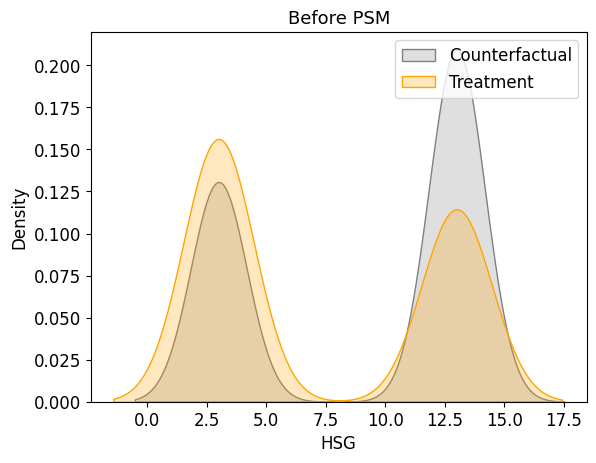

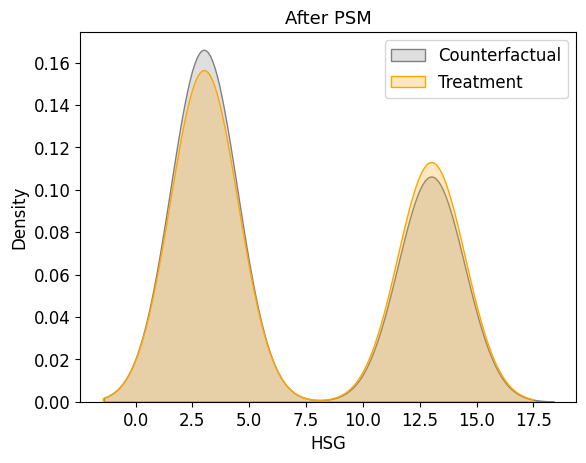

In [ ]:
kde_plot(treated_df, cf_df, 'HSG', 'orange', first)
print()
kde_plot(treated_dfn, cf_dfn, 'HSG', 'orange', second)

###CEC

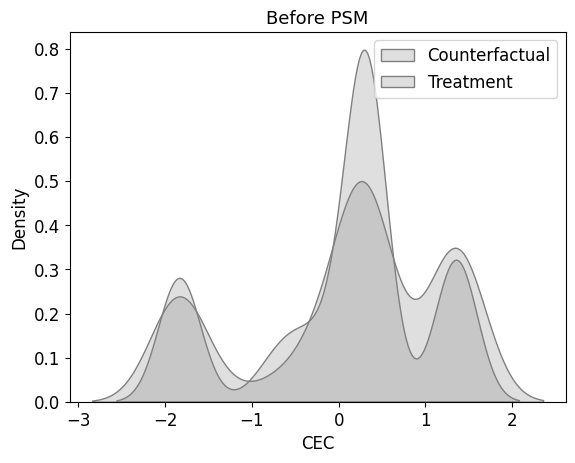

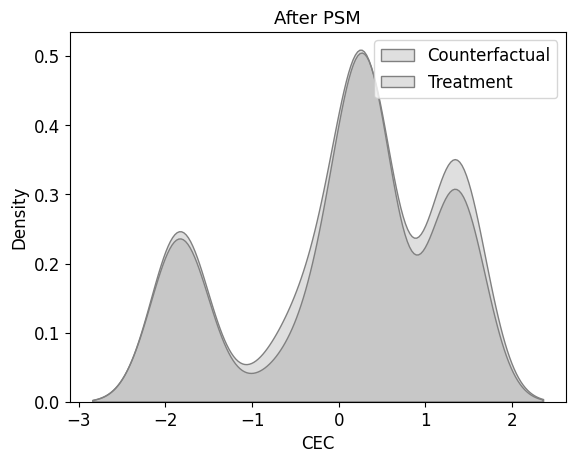

In [ ]:
kde_plot(treated_df, cf_df, 'CEC', 'grey', first)
print()
kde_plot(treated_dfn, cf_dfn, 'CEC', 'grey', second)

###PH

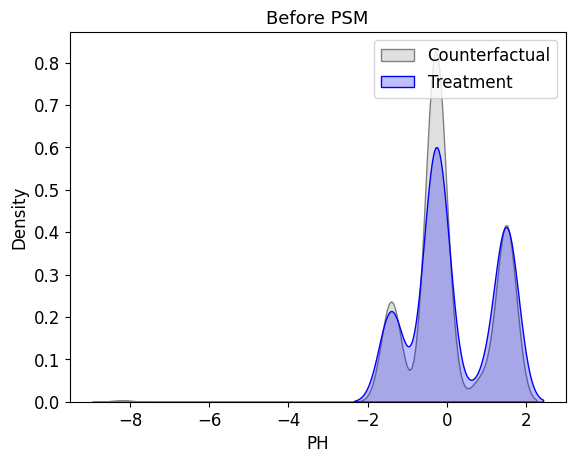

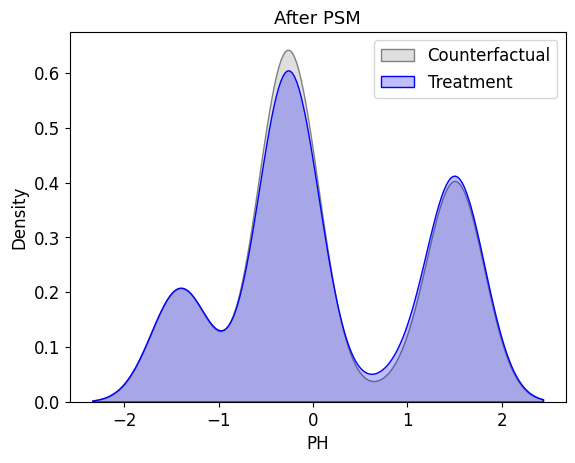

In [ ]:
kde_plot(treated_df, cf_df, 'PH', 'blue', first)
print()
kde_plot(treated_dfn, cf_dfn, 'PH', 'blue', second)

###OC

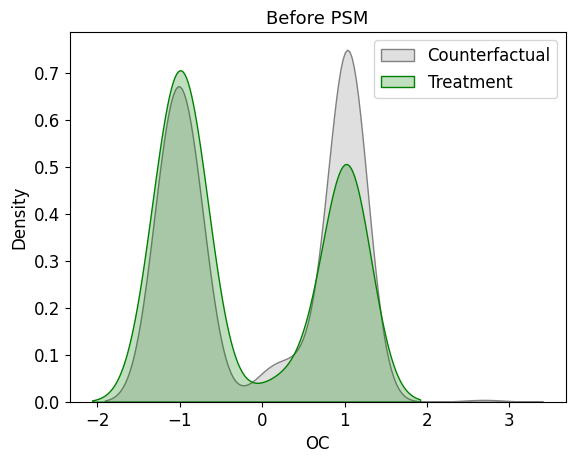

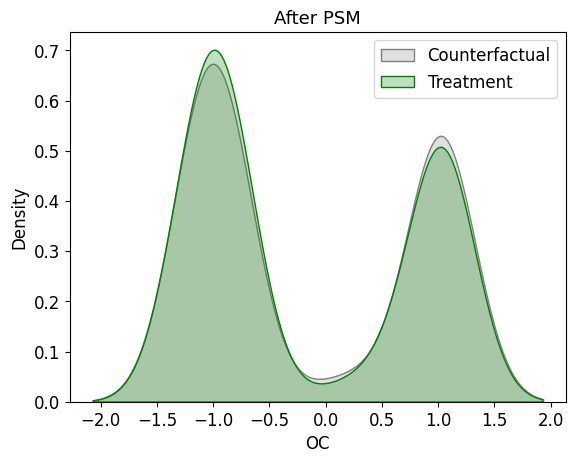

In [ ]:
kde_plot(treated_df, cf_df, 'OC', 'green', first)
print()
kde_plot(treated_dfn, cf_dfn, 'OC', 'green', second)

##KL Divergence

###Elevation

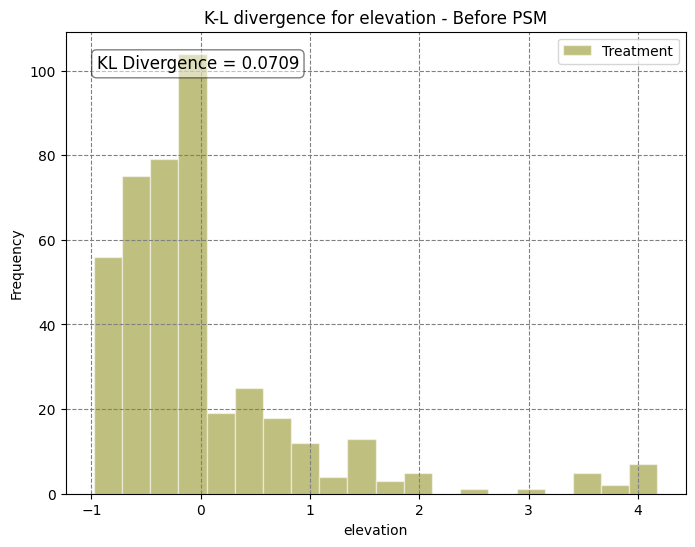

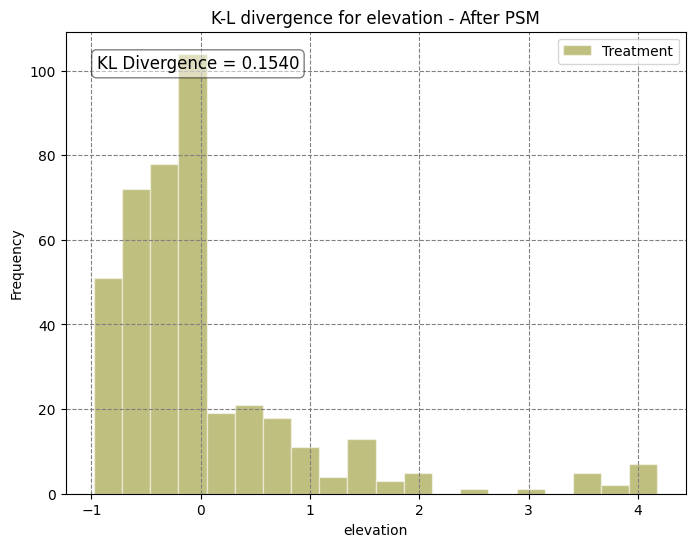

0.15398347679074664

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'elevation', 'olive', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'elevation', 'olive', second)

###Slope

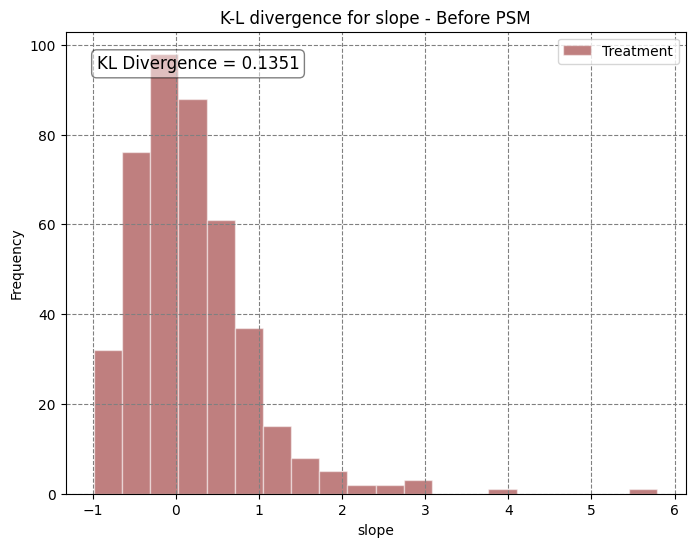

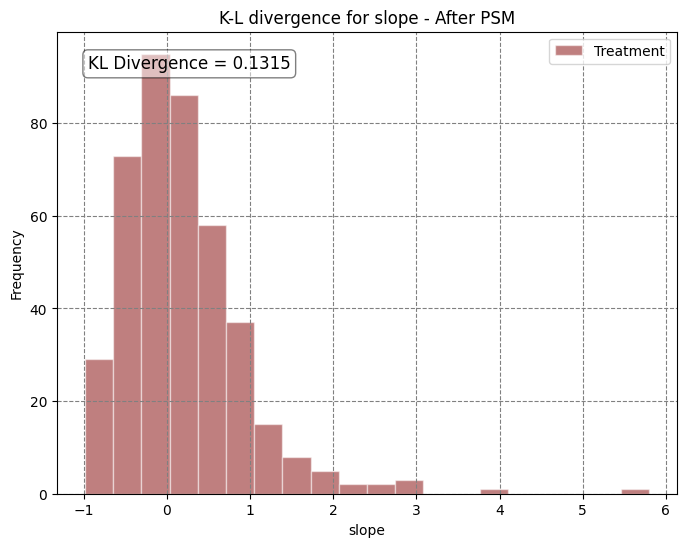

0.13151316557034828

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'slope', 'maroon', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'slope', 'maroon', second)

###Distance to Closest River

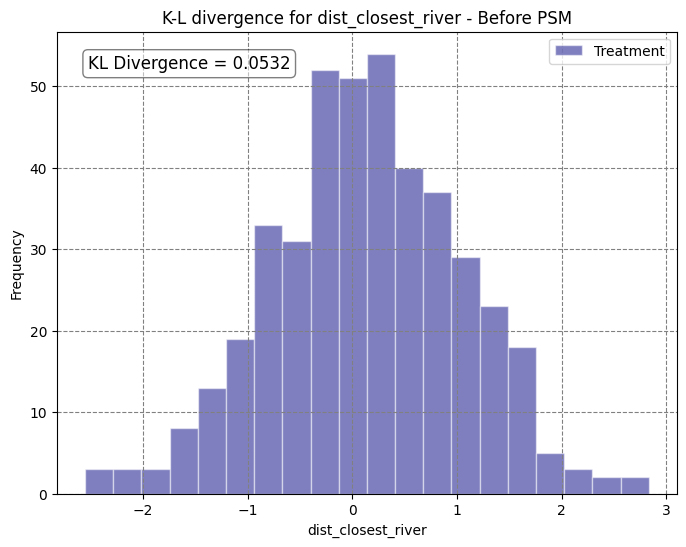

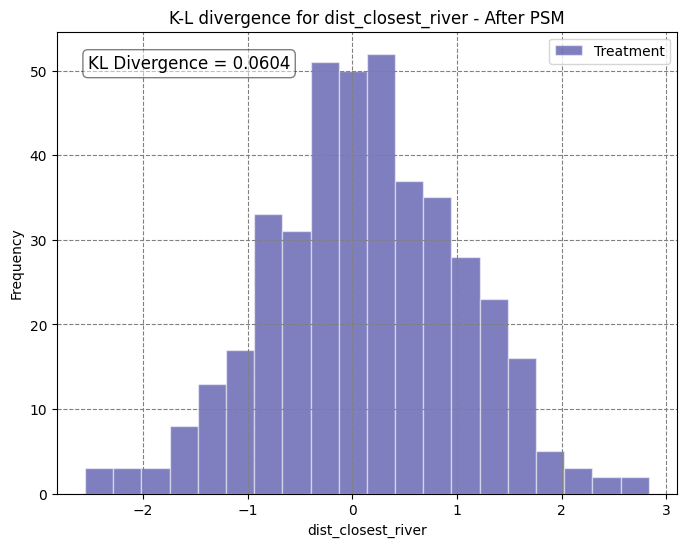

0.060440455278336226

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'dist_closest_river', 'navy', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'dist_closest_river', 'navy', second)

###Flow Accumulation

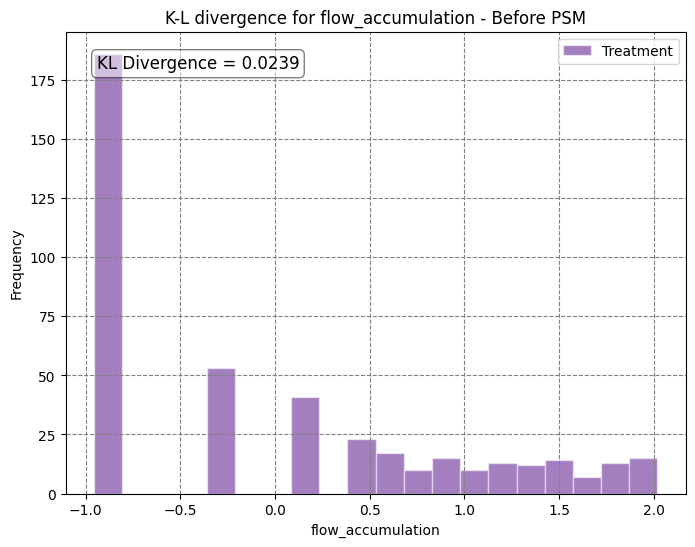

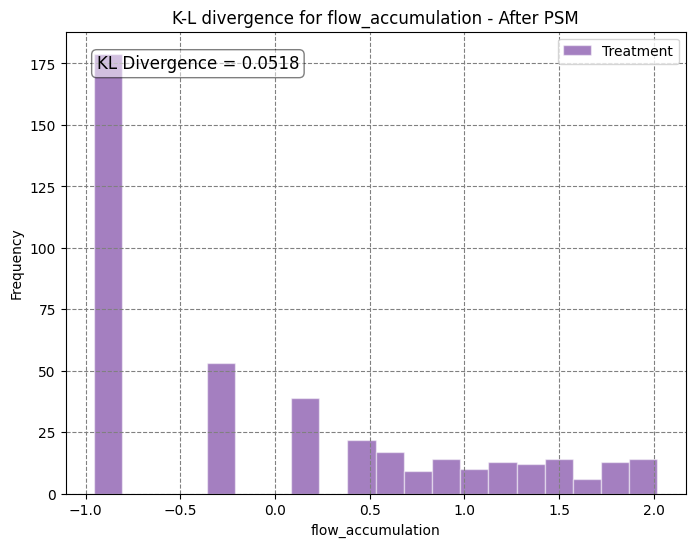

0.05179101842538911

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'flow_accumulation', 'indigo', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'flow_accumulation', 'indigo', second)

###Distance to Closest Lineament

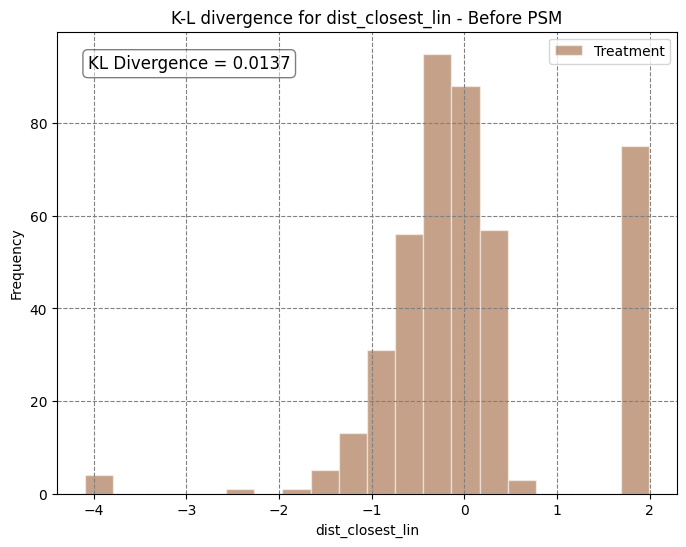

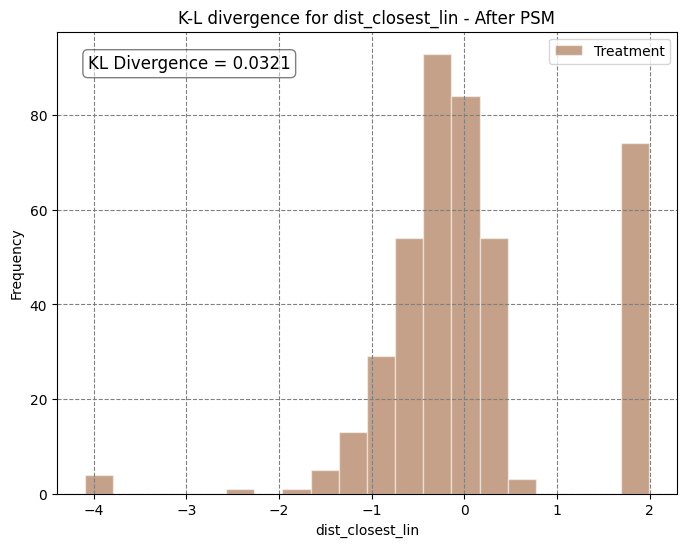

0.03210297324257737

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'dist_closest_lin', 'saddlebrown', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'dist_closest_lin', 'saddlebrown', second)

###Distance to Closest Road

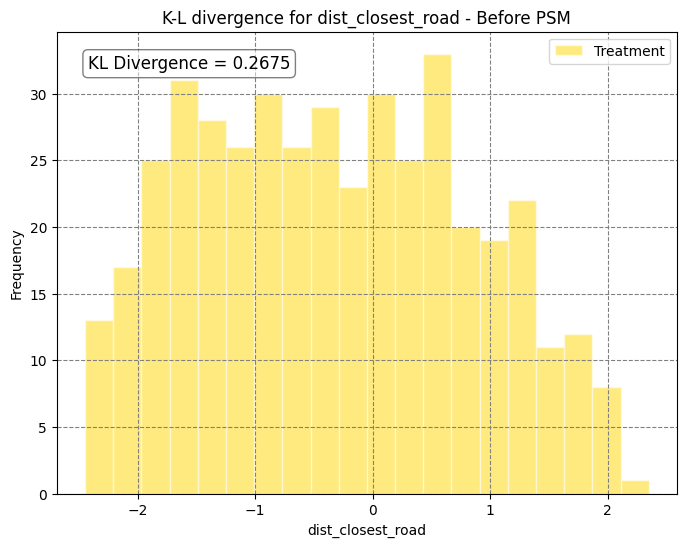

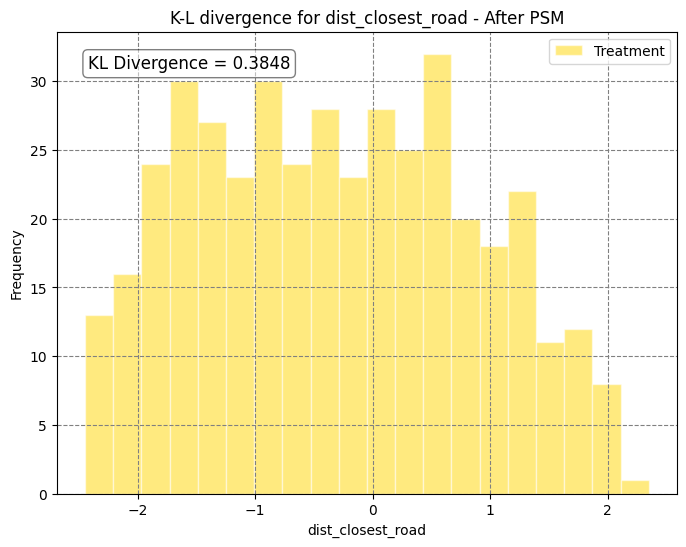

0.3847642282721069

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'dist_closest_road', 'gold', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'dist_closest_road', 'gold', second)

###Recent Cropping Intensity

0      2.0
1      2.0
2      1.0
3      2.0
4      3.0
      ... 
423    2.0
424    2.0
425    2.0
426    2.0
428    1.0
Name: cropping_intensity_2016-2017, Length: 415, dtype: float64


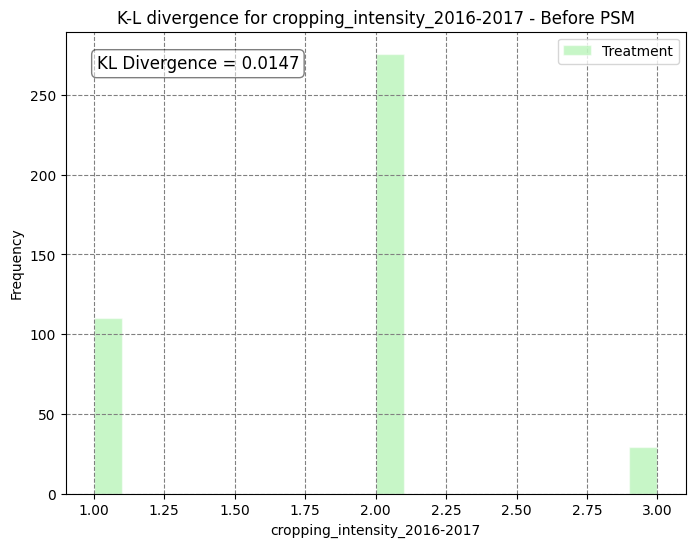


0      2.0
1      2.0
2      2.0
3      3.0
4      1.0
      ... 
410    2.0
411    2.0
412    2.0
413    2.0
414    2.0
Name: cropping_intensity_2016-2017, Length: 415, dtype: float64


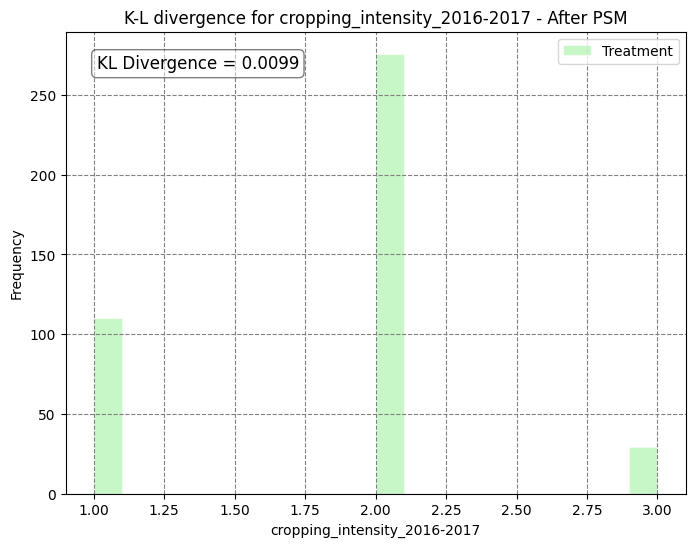

0.009850170753706016

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'cropping_intensity_2016-2017', 'lightgreen', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'cropping_intensity_2016-2017', 'lightgreen', second)

###Distance to Closest Upstream Forest

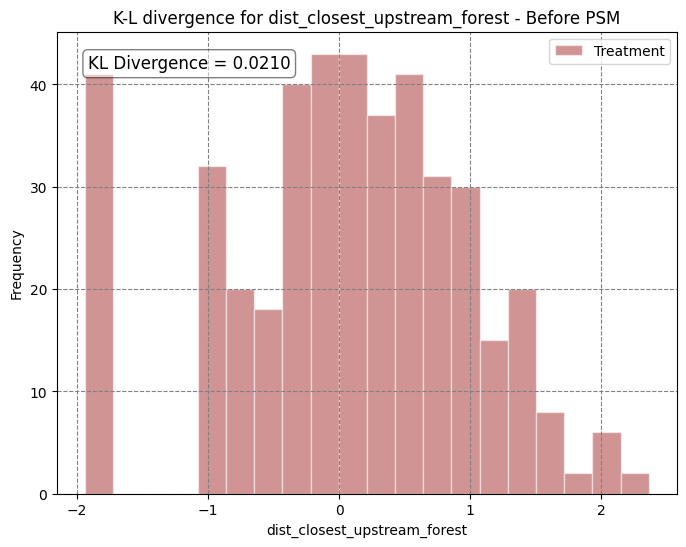

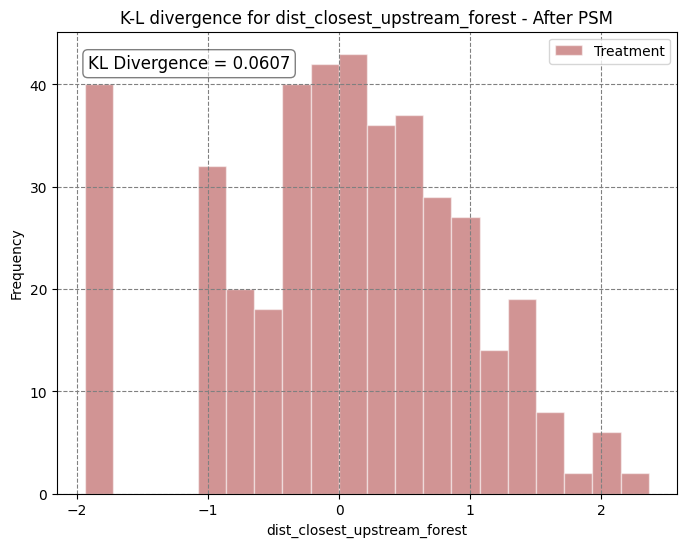

0.06068315629777059

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'dist_closest_upstream_forest', 'brown', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'dist_closest_upstream_forest', 'brown', second)

###Proximity to Water Pixels

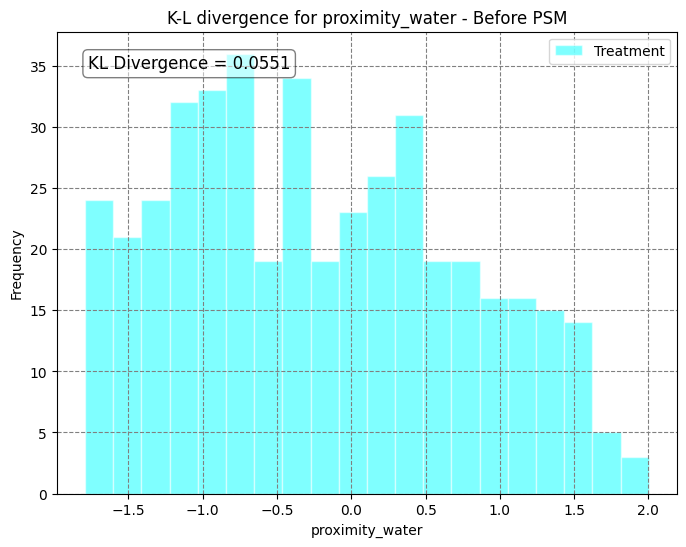

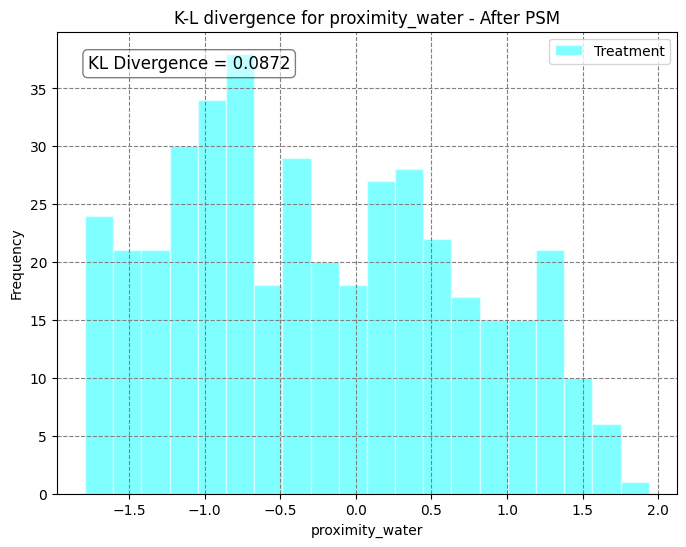

0.08721449810335825

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'proximity_water', 'aqua', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'proximity_water', 'aqua', second)

###Drainage_density

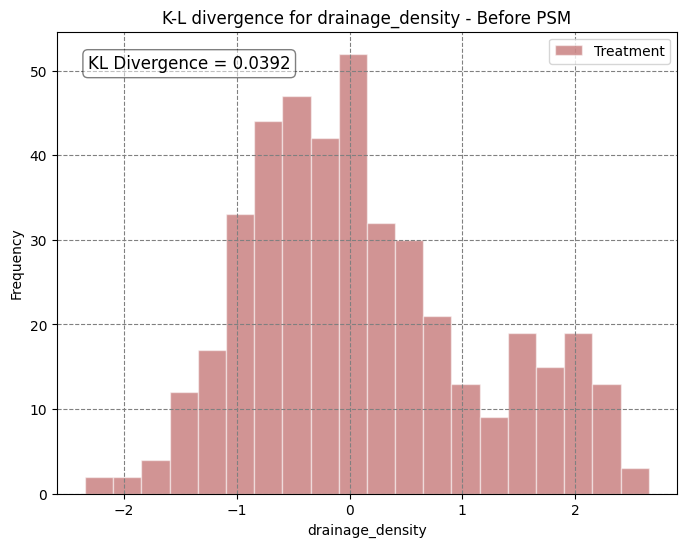

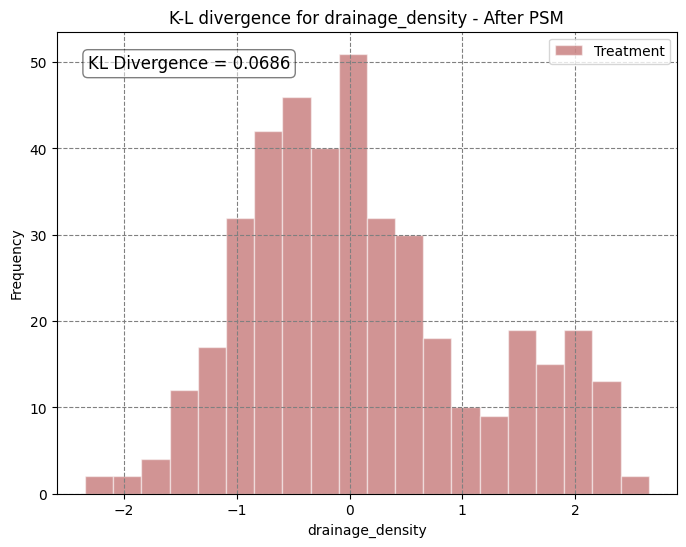

0.06863718806864982

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'drainage_density', 'brown', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'drainage_density', 'brown', second)

###HSG

0      13.0
1       3.0
2      13.0
3       3.0
4      13.0
       ... 
423    13.0
424     3.0
425    13.0
426    13.0
428     3.0
Name: HSG, Length: 415, dtype: float64


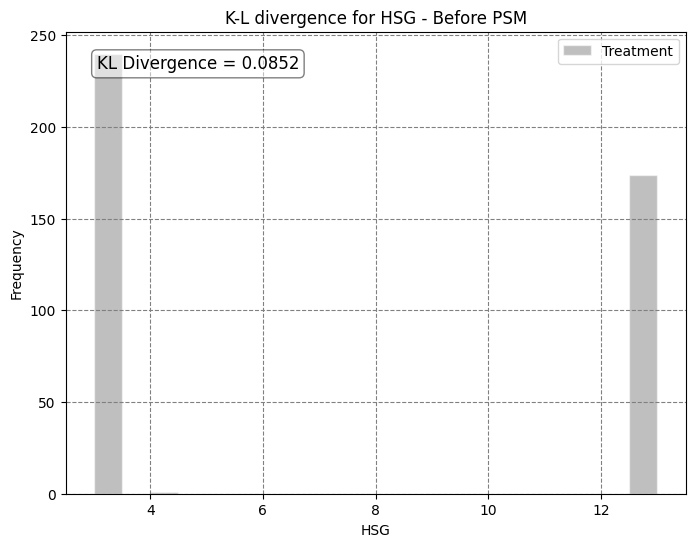


0      13.0
1       3.0
2       3.0
3       3.0
4      13.0
       ... 
410    13.0
411     3.0
412     3.0
413    13.0
414    13.0
Name: HSG, Length: 415, dtype: float64


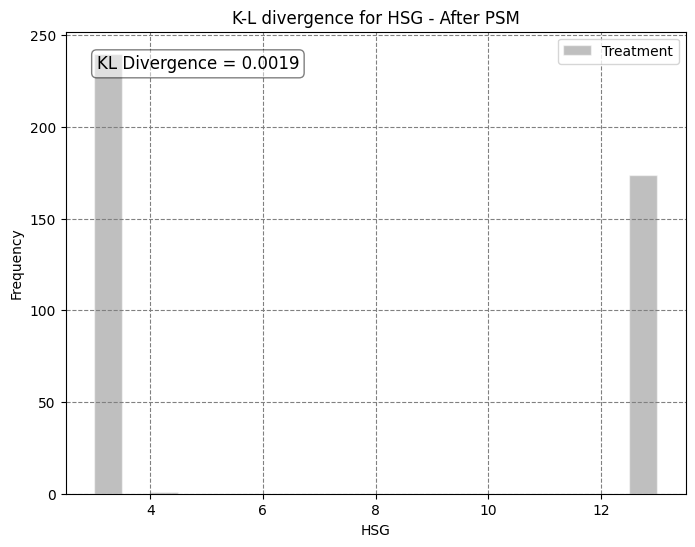

0.001926577937305475

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'HSG', 'grey', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'HSG', 'grey', second)

###CEC

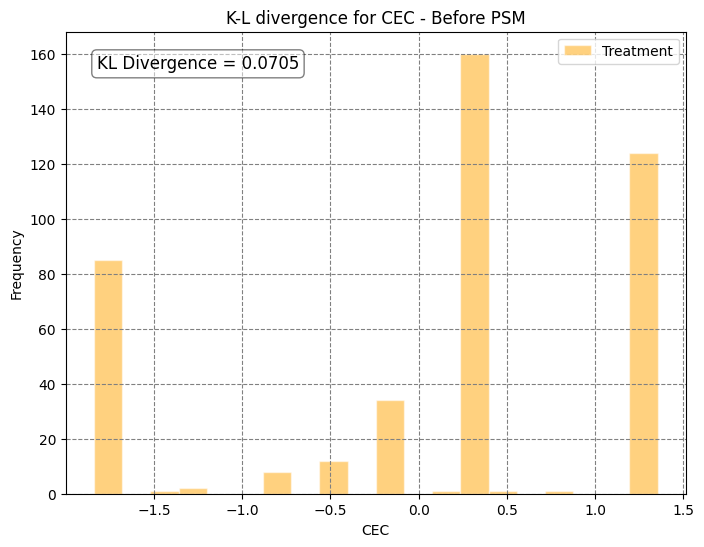

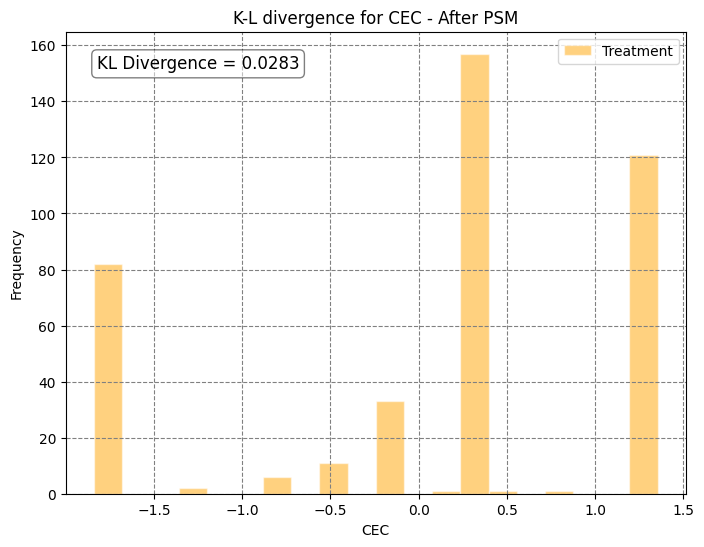

0.028342242058164796

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'CEC', 'orange', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'CEC', 'orange', second)

###PH

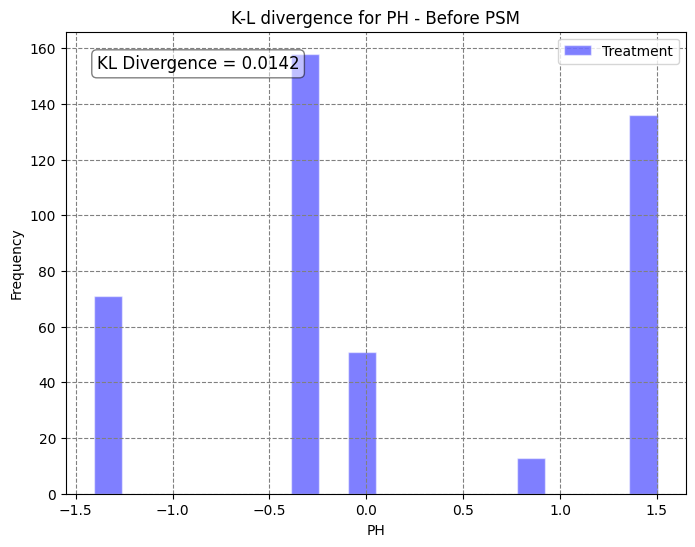

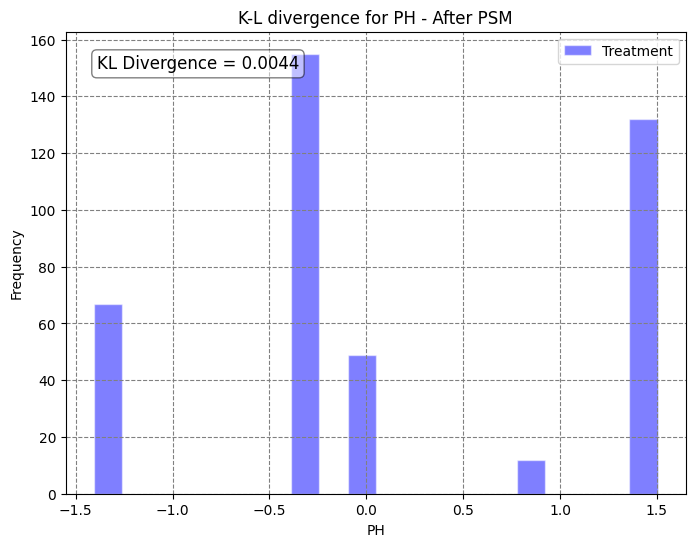

0.004445999141121083

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'PH', 'blue', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'PH', 'blue', second)

###OC

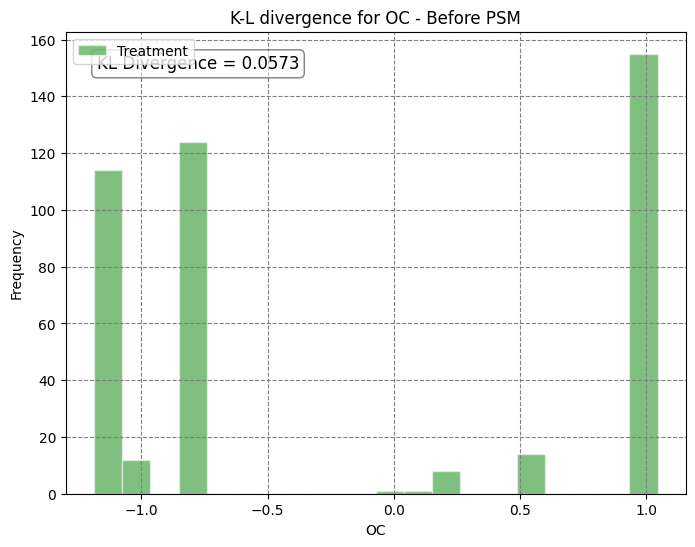

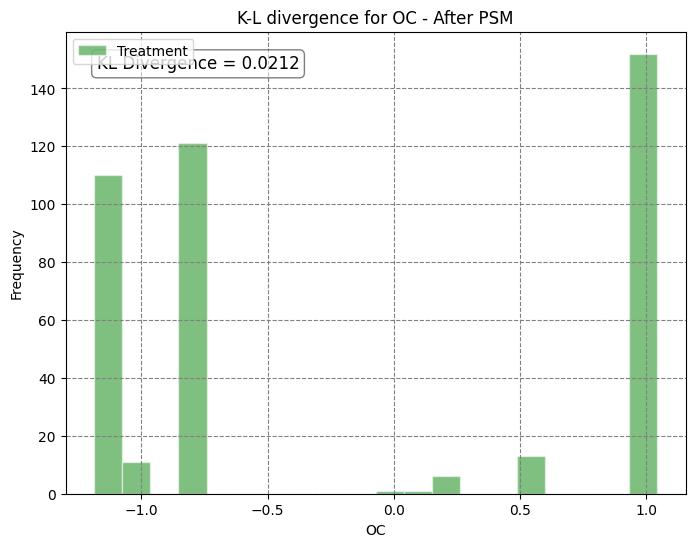

0.021248110696973483

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'OC', 'green', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'OC', 'green', second)

##QQ Plot

###Elevation

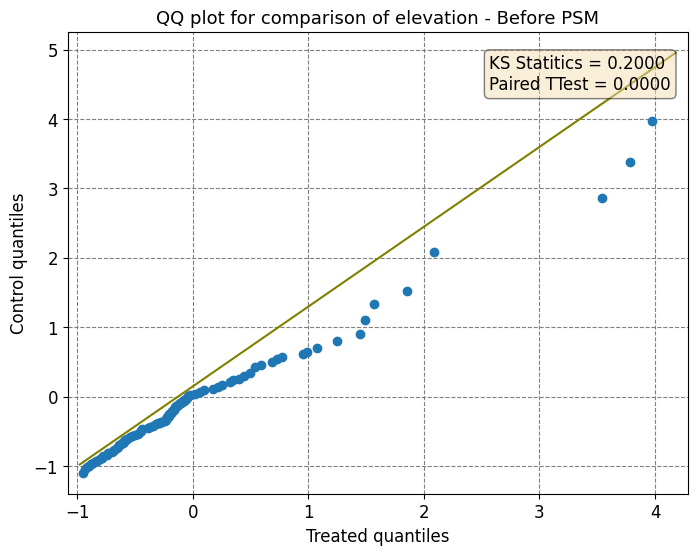

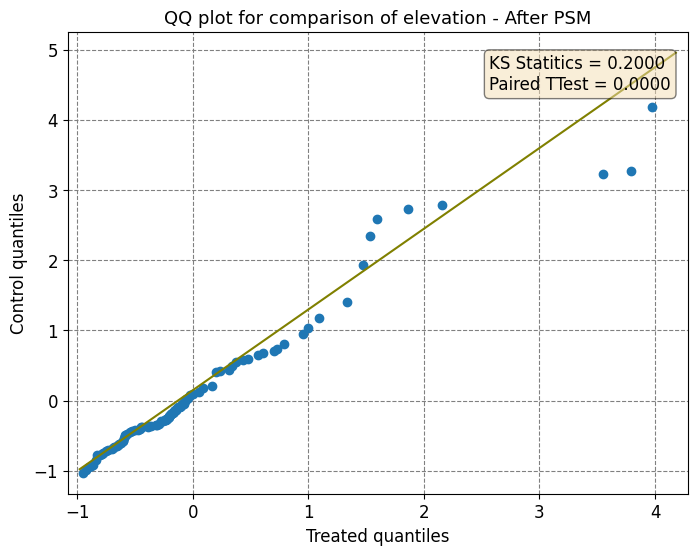

In [ ]:
generate_qq_plot(treated_df, cf_df, 'elevation', 'olive', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'elevation', 'olive', second)

###Slope

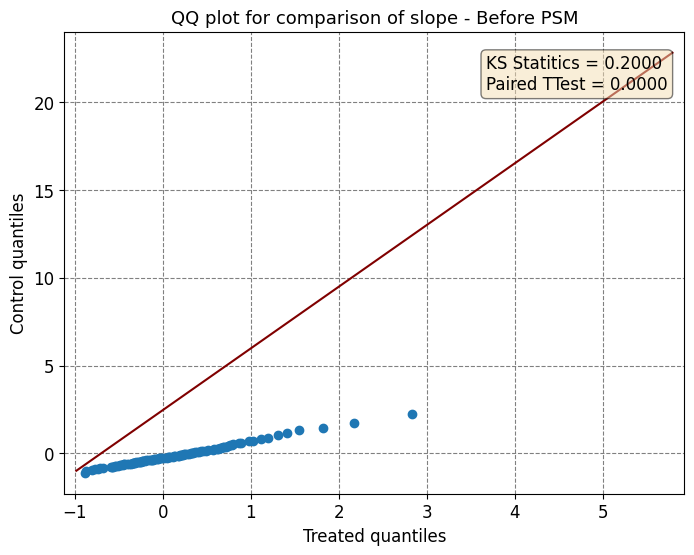

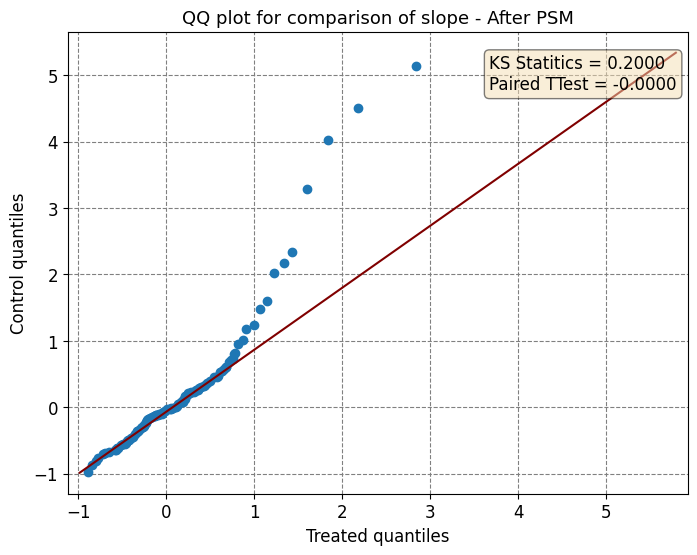

In [ ]:
generate_qq_plot(treated_df, cf_df, 'slope', 'maroon', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'slope', 'maroon', second)

###Distance to Closest River

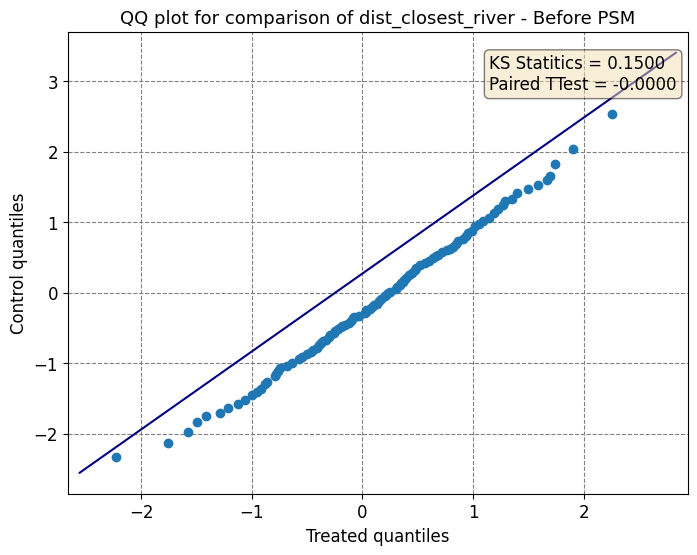

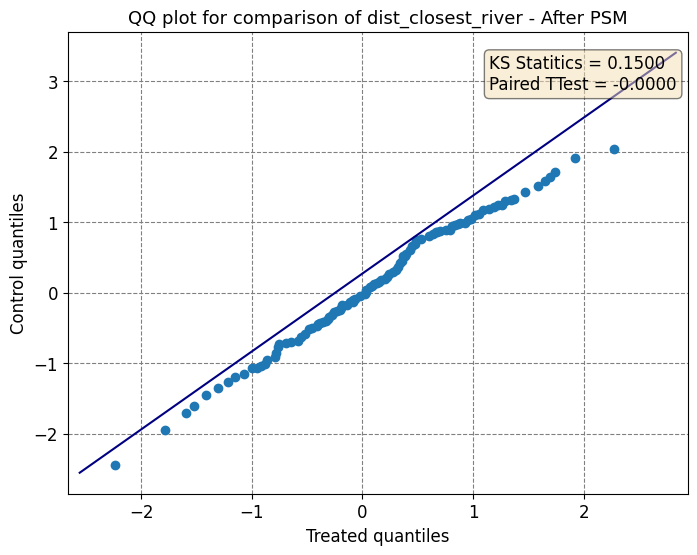

In [ ]:
generate_qq_plot(treated_df, cf_df, 'dist_closest_river', 'navy', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'dist_closest_river', 'navy', second)

###Flow Accumulation

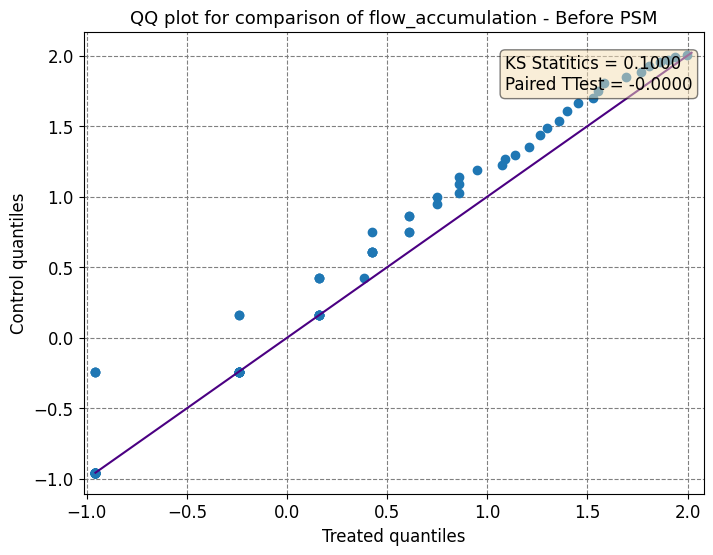

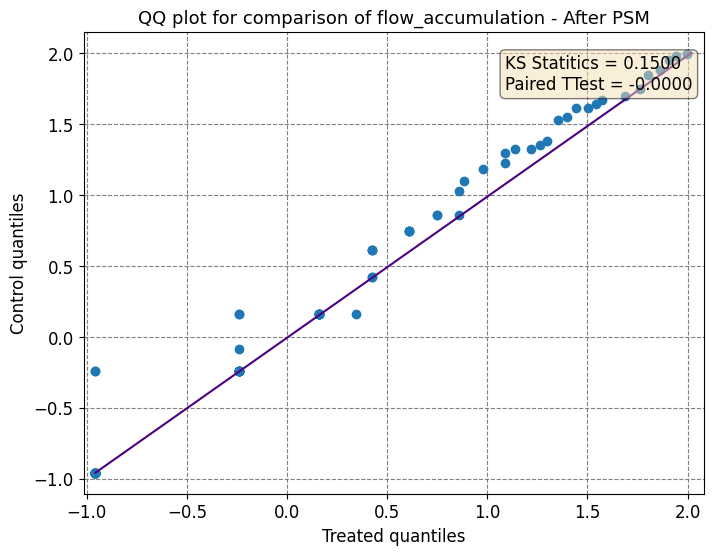

In [ ]:
generate_qq_plot(treated_df, cf_df, 'flow_accumulation', 'indigo', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'flow_accumulation', 'indigo', second)

###Distance to Closest Lineament

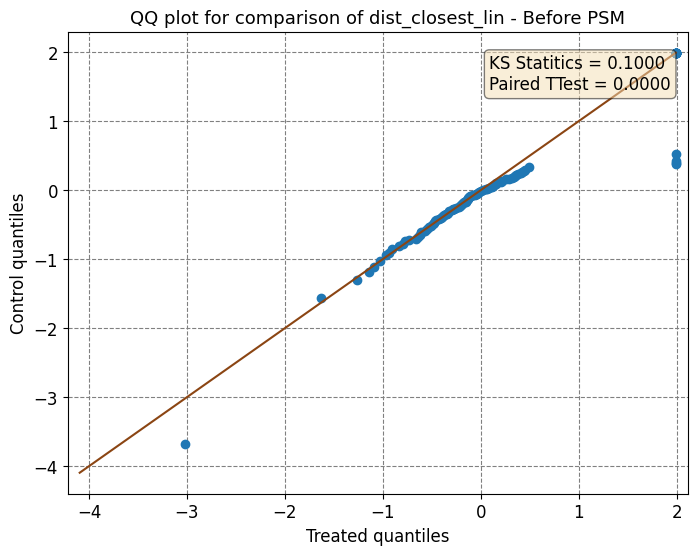

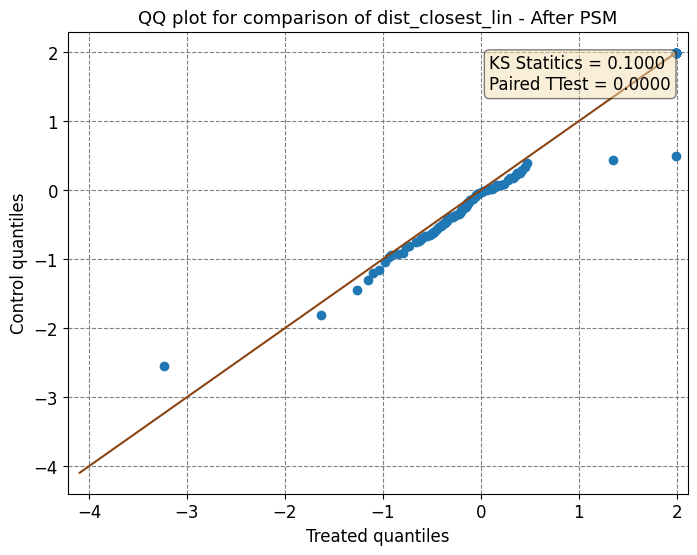

In [ ]:
generate_qq_plot(treated_df, cf_df, 'dist_closest_lin', 'saddlebrown', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'dist_closest_lin', 'saddlebrown', second)

###Distance to Closest Road

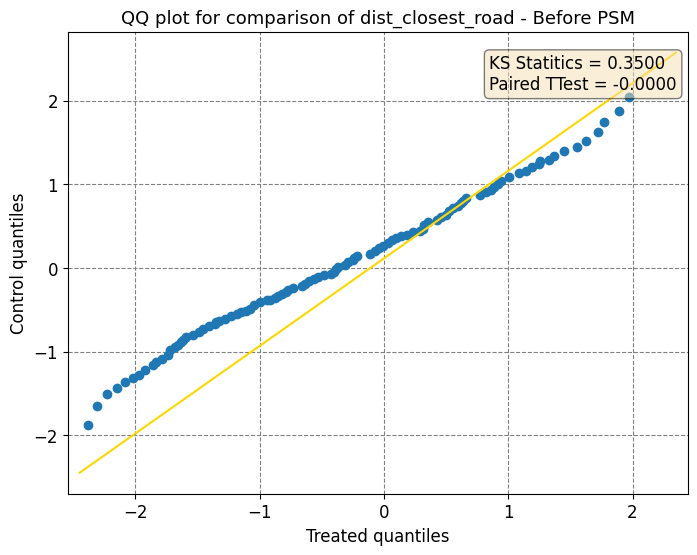

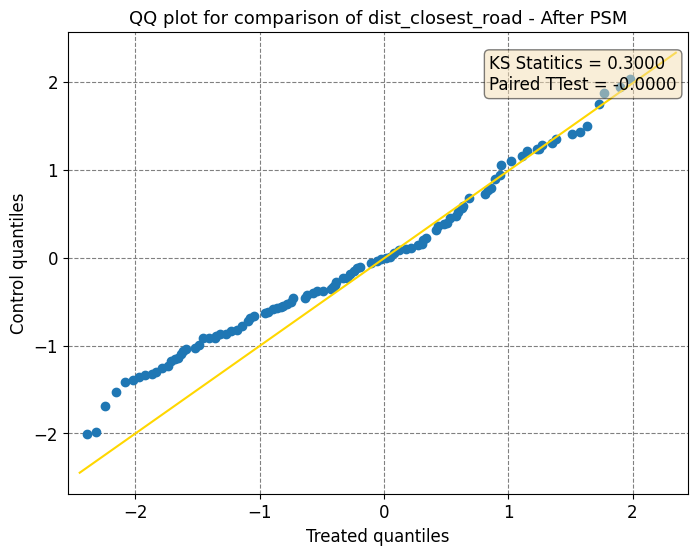

In [ ]:
generate_qq_plot(treated_df, cf_df, 'dist_closest_road', 'gold', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'dist_closest_road', 'gold', second)

###Recent Cropping Intensity

Error in qq plot: autodetected range of [nan, nan] is not finite



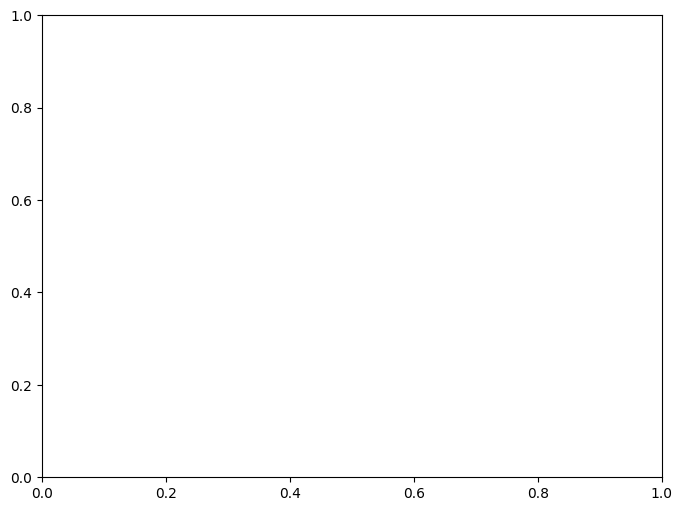

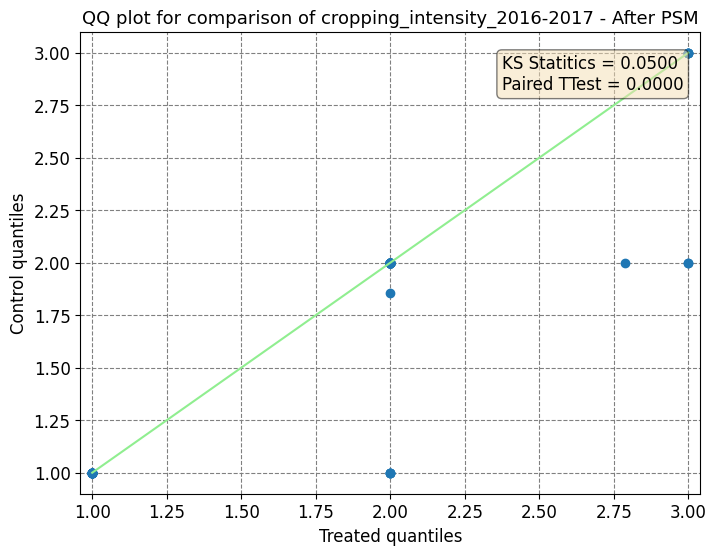

In [ ]:
generate_qq_plot(treated_df, cf_df, 'cropping_intensity_2016-2017', 'lightgreen', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'cropping_intensity_2016-2017', 'lightgreen', second)

###Distance to Closest Upstream Forest

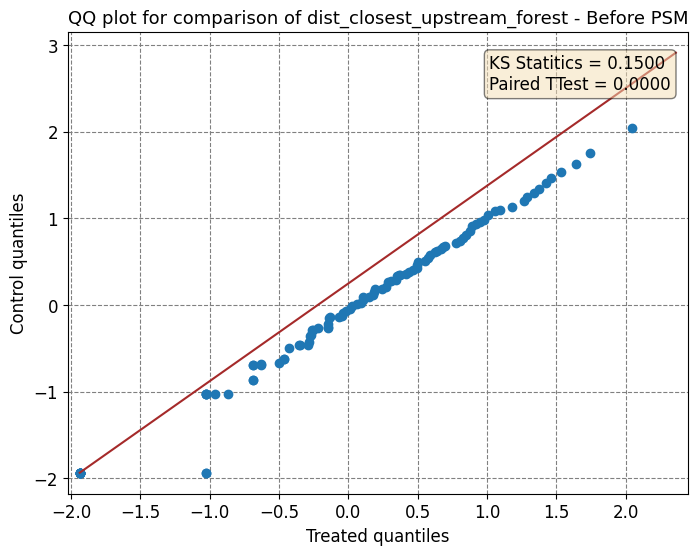

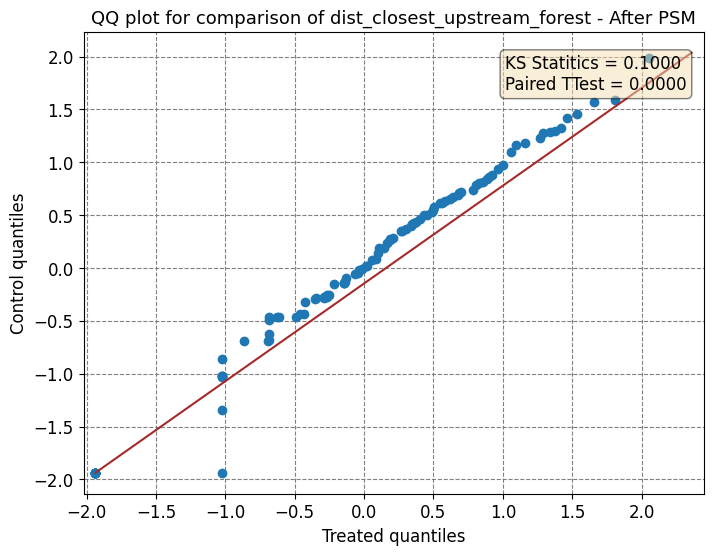

In [ ]:
generate_qq_plot(treated_df, cf_df, 'dist_closest_upstream_forest', 'brown', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'dist_closest_upstream_forest', 'brown', second)

###Proximity to Water Pixels

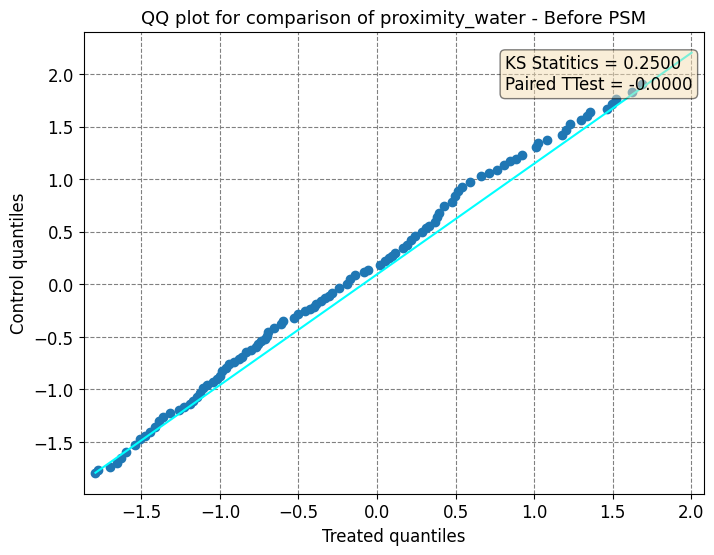

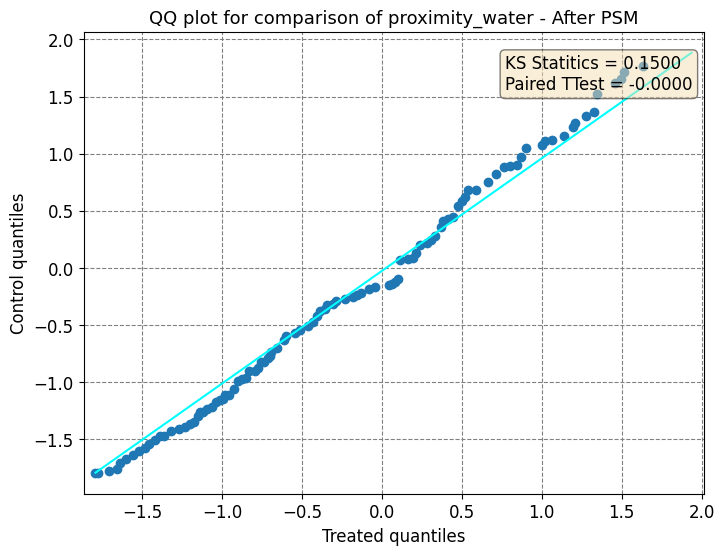

In [ ]:
generate_qq_plot(treated_df, cf_df, 'proximity_water', 'aqua', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'proximity_water', 'aqua', second)

###Drainage_density

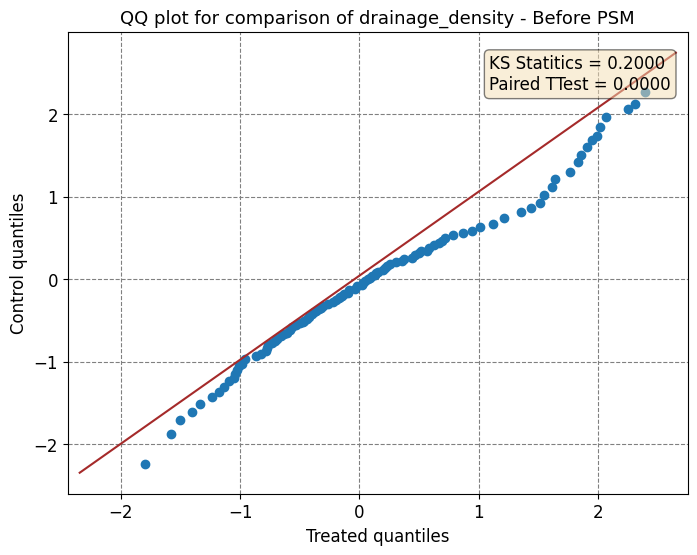

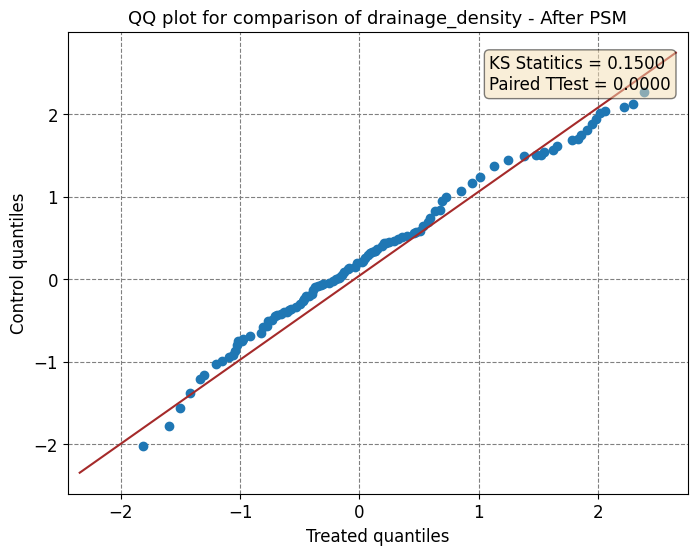

In [ ]:
generate_qq_plot(treated_df, cf_df, 'drainage_density', 'brown', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'drainage_density', 'brown', second)

###HSG

Error in qq plot: autodetected range of [nan, nan] is not finite



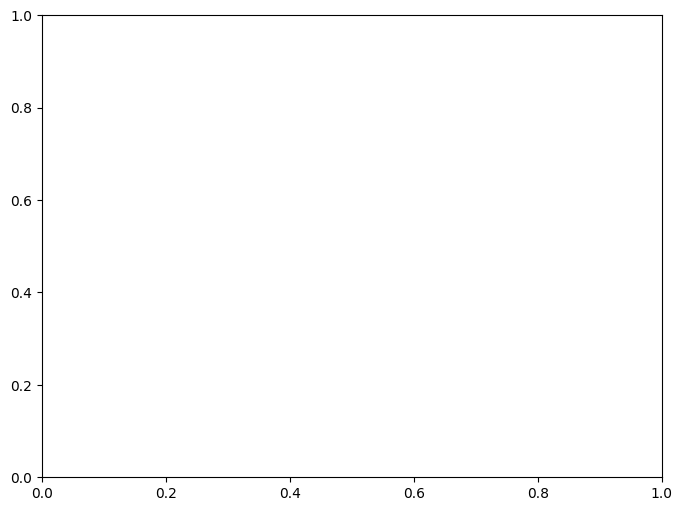

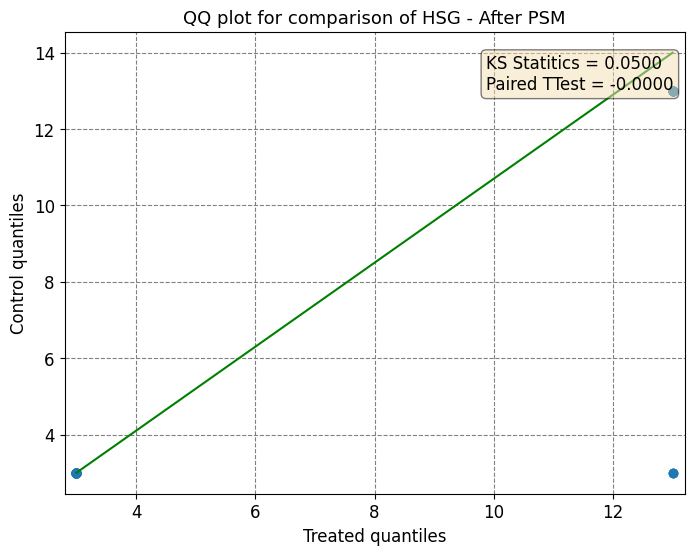

In [ ]:
generate_qq_plot(treated_df, cf_df, 'HSG', 'green', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'HSG', 'green', second)

###CEC

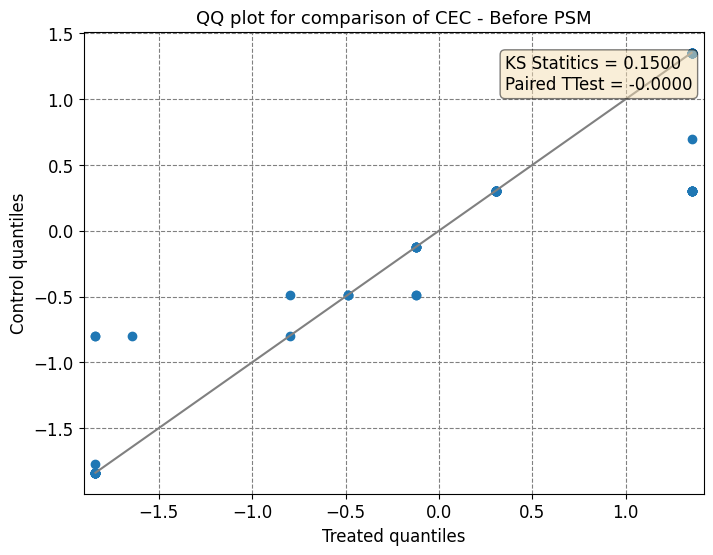

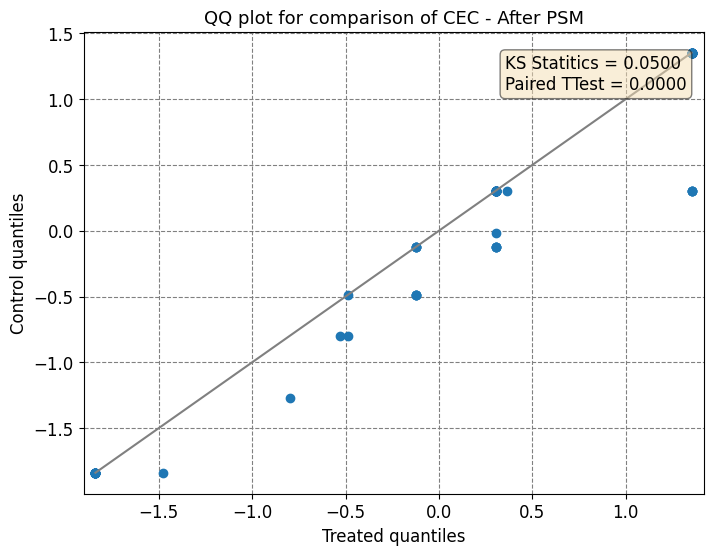

In [ ]:
generate_qq_plot(treated_df, cf_df, 'CEC', 'grey', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'CEC', 'grey', second)

###PH

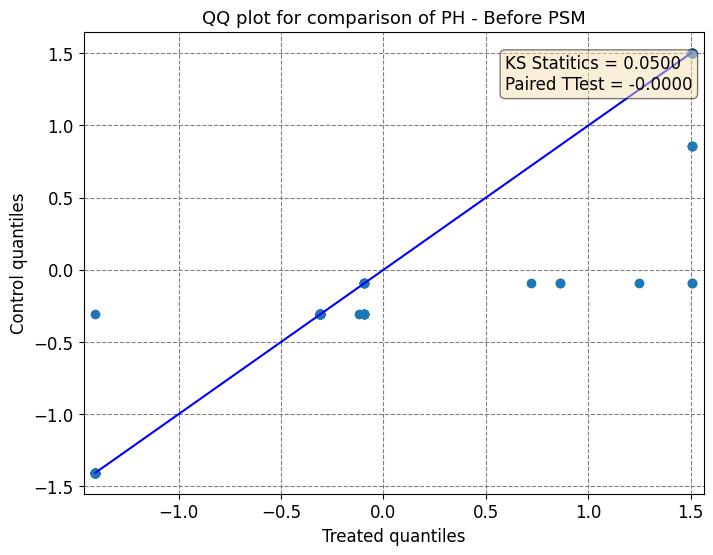

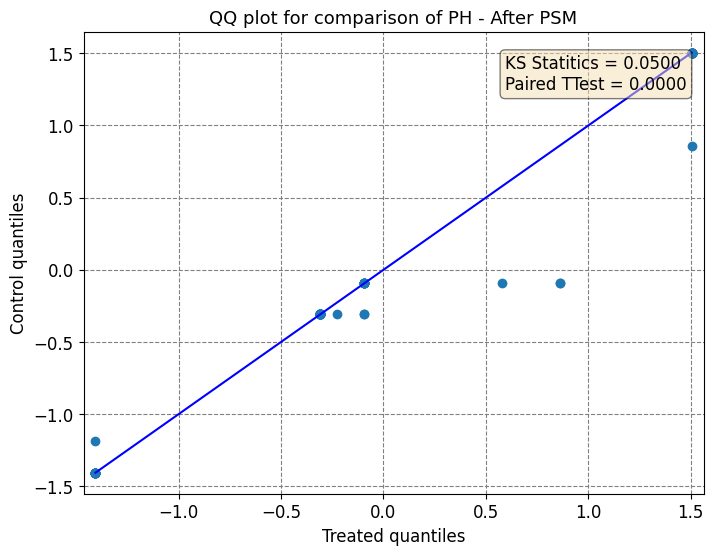

In [ ]:
generate_qq_plot(treated_df, cf_df, 'PH', 'blue', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'PH', 'blue', second)

###OC

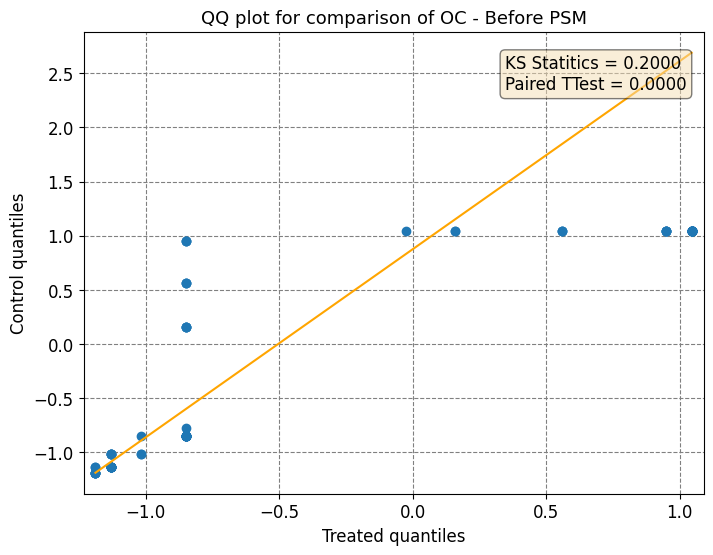

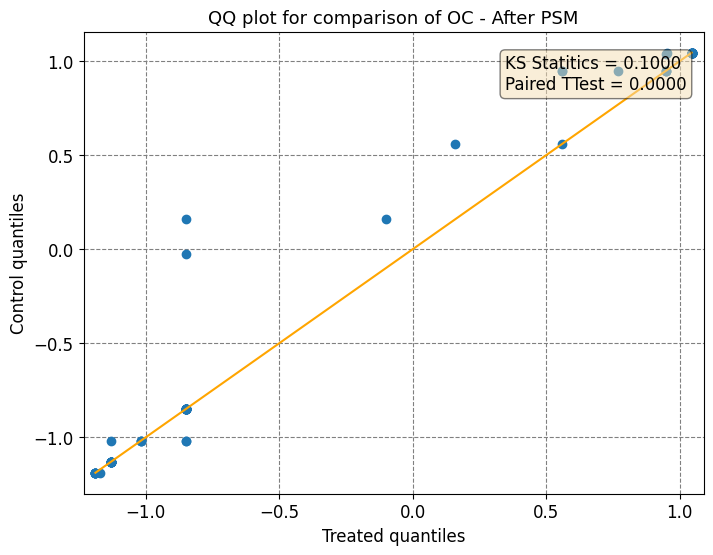

In [ ]:
generate_qq_plot(treated_df, cf_df, 'OC', 'orange', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'OC', 'orange', second)

##Paired T Test

###Elevation

In [ ]:
paired_ttest(treated_df, cf_df, 'elevation', 'olive', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'elevation', 'olive', second)

Before PSM:- statistics : 1.91216040585e-16, pvalue : 0.9999999999999998
KstestResult(statistic=0.2, pvalue=0.8319696107963263, statistic_location=0.00904036446602607, statistic_sign=1)

After PSM:- statistics : 6.38957883975007e-16, pvalue : 0.9999999999999996
KstestResult(statistic=0.2, pvalue=0.8319696107963263, statistic_location=0.009345340616687191, statistic_sign=1)


###Slope

In [ ]:
paired_ttest(treated_df, cf_df, 'slope', 'maroon', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'slope', 'maroon', second)

Before PSM:- statistics : 2.554094010880772e-16, pvalue : 0.9999999999999998
KstestResult(statistic=0.2, pvalue=0.8319696107963263, statistic_location=0.004669072457503267, statistic_sign=-1)

After PSM:- statistics : -8.360114572782447e-16, pvalue : 0.9999999999999993
KstestResult(statistic=0.2, pvalue=0.8319696107963263, statistic_location=0.021331473203436584, statistic_sign=1)


###Distance to Closest River

In [ ]:
paired_ttest(treated_df, cf_df, 'dist_closest_river', 'navy', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'dist_closest_river', 'navy', second)

Before PSM:- statistics : -6.438801971603735e-16, pvalue : 0.9999999999999996
KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=0.16450295746765464, statistic_sign=1)

After PSM:- statistics : -1.0956938270017957e-16, pvalue : 0.9999999999999999
KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=0.42475004884368334, statistic_sign=-1)


###Flow Accumulation

In [ ]:
paired_ttest(treated_df, cf_df, 'flow_accumulation', 'indigo', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'flow_accumulation', 'indigo', second)

Before PSM:- statistics : -1.9761197724573103e-15, pvalue : 0.9999999999999984
KstestResult(statistic=0.1, pvalue=0.9999923931635496, statistic_location=0.26617760551214276, statistic_sign=1)

After PSM:- statistics : -1.5293161531621604e-15, pvalue : 0.9999999999999988
KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=0.2265999572935403, statistic_sign=1)


###Distance to Closest Lineament

In [ ]:
paired_ttest(treated_df, cf_df, 'dist_closest_lin', 'saddlebrown', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'dist_closest_lin', 'saddlebrown', second)

Before PSM:- statistics : 2.618579370962579e-16, pvalue : 0.9999999999999998
KstestResult(statistic=0.1, pvalue=0.9999923931635496, statistic_location=0.7277672143476357, statistic_sign=1)

After PSM:- statistics : 1.7335015890822948e-15, pvalue : 0.9999999999999987
KstestResult(statistic=0.1, pvalue=0.9999923931635496, statistic_location=0.007919141026129008, statistic_sign=1)


###Distance to Closest Road

In [ ]:
paired_ttest(treated_df, cf_df, 'dist_closest_road', 'gold', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'dist_closest_road', 'gold', second)

Before PSM:- statistics : -1.216057787197852e-16, pvalue : 0.9999999999999999
KstestResult(statistic=0.35, pvalue=0.17453300569806826, statistic_location=0.3013092049769942, statistic_sign=1)

After PSM:- statistics : -1.3582445384007184e-16, pvalue : 0.9999999999999999
KstestResult(statistic=0.3, pvalue=0.33559098126008213, statistic_location=0.32152139649624345, statistic_sign=1)


###Recent Cropping Intensity

In [ ]:
paired_ttest(treated_df, cf_df, 'cropping_intensity_2016-2017', 'lightgreen', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'cropping_intensity_2016-2017', 'lightgreen', second)

Before PSM:- statistics : 2.4909152152841277e-16, pvalue : 0.9999999999999998
KstestResult(statistic=0.05, pvalue=0.9999999999999998, statistic_location=0.698795180722894, statistic_sign=1)

After PSM:- statistics : 3.0833349238303396e-15, pvalue : 0.9999999999999976
KstestResult(statistic=0.05, pvalue=0.9999999999999998, statistic_location=0.4337349397590377, statistic_sign=-1)


###Distance to Closest Upstream Forest

In [ ]:
paired_ttest(treated_df, cf_df, 'dist_closest_upstream_forest', 'brown', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'dist_closest_upstream_forest', 'brown', second)

Before PSM:- statistics : 2.2506561992190536e-16, pvalue : 0.9999999999999998
KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=0.21692695550215887, statistic_sign=1)

After PSM:- statistics : 9.380669673505647e-16, pvalue : 0.9999999999999993
KstestResult(statistic=0.1, pvalue=0.9999923931635496, statistic_location=0.41485320056455033, statistic_sign=1)


###Proximity to Water Pixels

In [ ]:
paired_ttest(treated_df, cf_df, 'proximity_water', 'aqua', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'proximity_water', 'aqua', second)

Before PSM:- statistics : -2.808388077318544e-16, pvalue : 0.9999999999999998
KstestResult(statistic=0.25, pvalue=0.571336004933722, statistic_location=0.19659011535461252, statistic_sign=1)

After PSM:- statistics : -5.323317723706207e-16, pvalue : 0.9999999999999996
KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=0.21966429489715109, statistic_sign=-1)


###Drainage_density

In [ ]:
paired_ttest(treated_df, cf_df, 'drainage_density', 'brown', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'drainage_density', 'brown', second)

Before PSM:- statistics : 4.776073201240971e-16, pvalue : 0.9999999999999996
KstestResult(statistic=0.2, pvalue=0.8319696107963263, statistic_location=0.11293652942412982, statistic_sign=-1)

After PSM:- statistics : 3.5926930425695873e-17, pvalue : 1.0
KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=0.18312499499996956, statistic_sign=1)


###HSG

In [ ]:
paired_ttest(treated_df, cf_df, 'HSG', 'grey', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'HSG', 'grey', second)

Before PSM:- statistics : -1.878403443272393e-16, pvalue : 0.9999999999999998
KstestResult(statistic=0.05, pvalue=0.9999999999999998, statistic_location=0.004819277108433735, statistic_sign=1)

After PSM:- statistics : -1.416497763538143e-15, pvalue : 0.9999999999999989
KstestResult(statistic=0.05, pvalue=0.9999999999999998, statistic_location=0.004819277108433735, statistic_sign=1)


###CEC

In [ ]:
paired_ttest(treated_df, cf_df, 'CEC', 'blue', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'CEC', 'blue', second)

Before PSM:- statistics : -7.208757780201298e-16, pvalue : 0.9999999999999994
KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=0.0, statistic_sign=1)

After PSM:- statistics : 0.0, pvalue : 1.0
KstestResult(statistic=0.05, pvalue=0.9999999999999998, statistic_location=0.015094326451213062, statistic_sign=1)


###PH

In [ ]:
paired_ttest(treated_df, cf_df, 'PH', 'orange', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'PH', 'orange', second)

Before PSM:- statistics : -2.2432081483218096e-15, pvalue : 0.9999999999999982
KstestResult(statistic=0.05, pvalue=0.9999999999999998, statistic_location=0.20826294154619177, statistic_sign=1)

After PSM:- statistics : 2.7417005759215544e-16, pvalue : 0.9999999999999998
KstestResult(statistic=0.05, pvalue=0.9999999999999998, statistic_location=2.56690348435848, statistic_sign=1)


###OC

In [ ]:
paired_ttest(treated_df, cf_df, 'OC', 'green', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'OC', 'green', second)

Before PSM:- statistics : 0.0, pvalue : 1.0
KstestResult(statistic=0.2, pvalue=0.8319696107963263, statistic_location=0.0, statistic_sign=1)

After PSM:- statistics : 7.551472447192759e-16, pvalue : 0.9999999999999993
KstestResult(statistic=0.1, pvalue=0.9999923931635496, statistic_location=2.2877966515523718, statistic_sign=-1)
